# Tobii Eye Tracking Analysis

Complete workflow for collecting, analyzing, and visualizing Tobii eye tracking data.

## Contents
1. Setup & Imports
2. Data Collection (Live Recording)
3. Load Existing Data
4. Preprocessing
5. Fixation & Saccade Detection
6. Heatmap Generation
7. AOI (Area of Interest) Analysis
8. Pupil Analysis
9. Visualizations
10. Export Results

## 1. Setup & Imports

In [1]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))
sys.path.insert(0, str(project_root / "src"))

# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Project modules
from src.collectors import TobiiCollector
from src.analyzers import TobiiAnalyzer
from src.visualization import TobiiVisualizer

# Settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

print("Setup complete!")

Setup complete!


## 2. Data Collection (Live Recording)

Use this section to record new data from a connected Tobii eye tracker.

**Skip this section if you already have recorded data.**

In [2]:
# # Initialize collector
# collector = TobiiCollector(output_dir="../data/raw/tobii")

# # Find available eye trackers
# trackers = collector.find_eyetrackers()
# print(f"Found {len(trackers)} eye tracker(s):")
# for i, t in enumerate(trackers):
#     print(f"  [{i}] {t['name']} - {t['model']} (Serial: {t['serial_number']})")

In [3]:
# # Connect to eye tracker
# if collector.connect():
#     # Display device info
#     info = collector.get_device_info()
#     print("\nDevice Information:")
#     for key, value in info.items():
#         print(f"  {key}: {value}")

In [4]:
# # Optional: Change sampling frequency
# available_freq = collector.get_available_frequencies()
# print(f"Available frequencies: {available_freq} Hz")

# # Uncomment to change frequency:
# # collector.set_frequency(120)  # Set to 120 Hz

In [5]:
# # Record data
# import time

# RECORDING_DURATION = 10  # seconds

# print(f"Starting {RECORDING_DURATION} second recording...")
# print("Look around the screen to generate gaze data.")

# collector.start_recording()

# # Progress indicator
# for i in range(RECORDING_DURATION):
#     time.sleep(1)
#     print(f"  Recording: {i+1}/{RECORDING_DURATION}s")

# stats = collector.stop_recording()
# print(f"\nRecording complete!")
# print(f"  Samples collected: {stats['gaze_samples']}")
# print(f"  Duration: {stats['duration']:.2f}s")
# print(f"  Effective sample rate: {stats['gaze_samples']/stats['duration']:.1f} Hz")

In [6]:
# # Save recorded data
# DATA_FILE = collector.save_data("experiment_001", format="csv")
# print(f"Data saved to: {DATA_FILE}")

# # Disconnect
# collector.disconnect()

## 3. Load Existing Data

Load previously recorded eye tracking data for analysis.

In [7]:
# Initialize analyzer
analyzer = TobiiAnalyzer()

# Load data - update path to your data file
DATA_FILE = "../data/raw/tobii/data_from_tobii_example_converted.csv"

# Check if file exists, if not list available files
data_path = Path(DATA_FILE)
if not data_path.exists():
    print(f"File not found: {DATA_FILE}")
    print("\nAvailable files in data/raw/tobii/:")
    tobii_dir = project_root / "data" / "raw" / "tobii"
    if tobii_dir.exists():
        for f in tobii_dir.glob("*.csv"):
            print(f"  - {f.name}")
        for f in tobii_dir.glob("*.parquet"):
            print(f"  - {f.name}")
else:
    data = analyzer.load_data(DATA_FILE)
    print(f"\nData shape: {data.shape}")
    print(f"Columns: {list(data.columns)}")

Loaded 142132 samples from ../data/raw/tobii/data_from_tobii_example_converted.csv

Data shape: (142132, 39)
Columns: ['recording_timestamp', 'device_timestamp', 'system_timestamp', 'gaze_x', 'gaze_y', 'left_gaze_x', 'left_gaze_y', 'right_gaze_x', 'right_gaze_y', 'left_gaze_valid', 'left_pupil_valid', 'left_origin_valid', 'right_gaze_valid', 'right_pupil_valid', 'right_origin_valid', 'left_pupil_diameter', 'right_pupil_diameter', 'left_origin_x', 'left_origin_y', 'left_origin_z', 'right_origin_x', 'right_origin_y', 'right_origin_z', 'left_gaze_direction_x', 'left_gaze_direction_y', 'left_gaze_direction_z', 'right_gaze_direction_x', 'right_gaze_direction_y', 'right_gaze_direction_z', 'left_eye_openness', 'right_eye_openness', 'eye_movement_type', 'eye_movement_index', 'fixation_x', 'fixation_y', 'event', 'event_value', 'stimulus_name', 'media_name']


/Users/yenokhakobyan/HCI Lab ToolKit/src/analyzers/tobii_analyzer.py:151: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filepath)


In [8]:
# Quick look at the raw data
if analyzer.data is not None:
    display(analyzer.data.head(10))
    print(f"\nData summary:")
    display(analyzer.data.describe())

recording_timestamp  device_timestamp  system_timestamp  gaze_x  gaze_y  \
0             0.000000       712431872.0       712431872.0     NaN     NaN   
1             0.001667       712433539.0       712433539.0     NaN     NaN   
2             0.003333       712435205.0       712435205.0     NaN     NaN   
3             0.005000       712436872.0       712436872.0     NaN     NaN   
4             0.006667       712438539.0       712438539.0     NaN     NaN   
5             0.008333       712440205.0       712440205.0     NaN     NaN   
6             0.010000       712441872.0       712441872.0     NaN     NaN   
7             0.011667       712443539.0       712443539.0     NaN     NaN   
8             0.013333       712445205.0       712445205.0     NaN     NaN   
9             0.015000       712446872.0       712446872.0     NaN     NaN   

   left_gaze_x  left_gaze_y  right_gaze_x  right_gaze_y  left_gaze_valid  ...  \
0          NaN          NaN           NaN           NaN                0  ...   
1          NaN          NaN           NaN           NaN                0  ...   
2          NaN          NaN           NaN           NaN                0  ...   
3          NaN          NaN           NaN           NaN                0  ...   
4          NaN          NaN           NaN           NaN                0  ...   
5          NaN          NaN           NaN           NaN                0  ...   
6          NaN          NaN           NaN           NaN                0  ...   
7          NaN          NaN           NaN           NaN                0  ...   
8          NaN          NaN           NaN           NaN                0  ...   
9          NaN          NaN           NaN           NaN                0  ...   

   left_eye_openness  right_eye_openness  eye_movement_type  \
0                NaN                 NaN       EyesNotFound   
1                NaN                 NaN       EyesNotFound   
2                NaN                 NaN       EyesNotFound   
3                NaN                 NaN       EyesNotFound   
4                NaN                 NaN       EyesNotFound   
5                NaN                 NaN       EyesNotFound   
6                NaN                 NaN       EyesNotFound   
7                NaN                 NaN       EyesNotFound   
8                NaN                 NaN       EyesNotFound   
9                NaN                 NaN       EyesNotFound   

   eye_movement_index  fixation_x  fixation_y  event  event_value  \
0                 1.0         NaN         NaN    NaN          NaN   
1                 1.0         NaN         NaN    NaN          NaN   
2                 1.0         NaN         NaN    NaN          NaN   
3                 1.0         NaN         NaN    NaN          NaN   
4                 1.0         NaN         NaN    NaN          NaN   
5                 1.0         NaN         NaN    NaN          NaN   
6                 1.0         NaN         NaN    NaN          NaN   
7                 1.0         NaN         NaN    NaN          NaN   
8                 1.0         NaN         NaN    NaN          NaN   
9                 1.0         NaN         NaN    NaN          NaN   

   stimulus_name  media_name  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
5            NaN         NaN  
6            NaN         NaN  
7            NaN         NaN  
8            NaN         NaN  
9            NaN         NaN  

[10 rows x 39 columns]


Data summary:


recording_timestamp  device_timestamp  system_timestamp         gaze_x  \
count        142132.000000      1.421320e+05      1.421320e+05  122282.000000   
mean            118.441936      8.308755e+08      8.308755e+08       0.365837   
std              68.383519      6.838449e+07      6.838449e+07       0.221481   
min               0.000000      7.124319e+08      7.124319e+08      -1.148958   
25%              59.220511      7.716533e+08      7.716533e+08       0.169792   
50%             118.441214      8.308748e+08      8.308748e+08       0.306771   
75%             177.663443      8.900979e+08      8.900979e+08       0.533333   
max             236.884104      9.493194e+08      9.493194e+08       1.636979   

              gaze_y    left_gaze_x    left_gaze_y  right_gaze_x  \
count  122282.000000  116966.000000  116966.000000  97978.000000   
mean        0.490992       0.366791       0.489012      0.364338   
std         0.190527       0.217008       0.189019      0.234436   
min        -0.149074      -0.344792      -0.043519     -1.214583   
25%         0.337963       0.169271       0.340741      0.171354   
50%         0.499074       0.304688       0.497222      0.314583   
75%         0.634259       0.529167       0.632407      0.532292   
max         1.627778       1.445312       1.627778      1.636979   

       right_gaze_y  left_gaze_valid  ...  right_gaze_direction_x  \
count  97978.000000    142132.000000  ...            97978.000000   
mean       0.491997         0.822939  ...               -0.121521   
std        0.193933         0.381721  ...                0.190442   
min       -0.339815         0.000000  ...               -0.858030   
25%        0.333333         1.000000  ...               -0.288530   
50%        0.497685         1.000000  ...               -0.164270   
75%        0.638889         1.000000  ...                0.011987   
max        1.560185         1.000000  ...                0.699360   

       right_gaze_direction_y  right_gaze_direction_z  left_eye_openness  \
count            97978.000000            97978.000000      135513.000000   
mean                -0.069020               -0.966141           8.450641   
std                  0.097236                0.036311           1.528549   
min                 -0.346840               -1.000000           0.000000   
25%                 -0.153590               -0.987000           8.378000   
50%                 -0.063245               -0.973940           8.823000   
75%                  0.006678               -0.952540           9.176000   
max                  0.390090               -0.513500          11.666000   

       right_eye_openness  eye_movement_index     fixation_x     fixation_y  \
count       134148.000000       142132.000000  109192.000000  109192.000000   
mean             8.000590          401.719374       0.360960       0.491838   
std              1.803887          370.427540       0.217426       0.187683   
min              0.000000            1.000000      -0.428646       0.003704   
25%              8.058000          176.000000       0.161458       0.334259   
50%              8.517000          346.000000       0.303125       0.500926   
75%              8.811000          501.000000       0.523958       0.633333   
max             11.366000         2148.000000       0.954167       1.049074   

       event  event_value  
count    0.0          0.0  
mean     NaN          NaN  
std      NaN          NaN  
min      NaN          NaN  
25%      NaN          NaN  
50%      NaN          NaN  
75%      NaN          NaN  
max      NaN          NaN  

[8 rows x 36 columns]

## 4. Preprocessing

Clean and prepare the data for analysis:
- Combine binocular gaze
- Handle missing data
- Convert to pixel coordinates

In [9]:
# Set screen size (update to match your display)
SCREEN_WIDTH = 1920
SCREEN_HEIGHT = 1080

analyzer.set_screen_size(SCREEN_WIDTH, SCREEN_HEIGHT)

# Preprocess data
processed_data = analyzer.preprocess(
    interpolate_missing=True,  # Fill short gaps
    filter_invalid=True        # Remove invalid samples
)

print(f"Original samples: {len(analyzer.data) if analyzer.data is not None else 0}")
print(f"After preprocessing: {len(processed_data)}")
print(f"\nNew columns added: gaze_x, gaze_y, gaze_x_px, gaze_y_px, gaze_valid, pupil_diameter")

Original samples: 122282
After preprocessing: 122282

New columns added: gaze_x, gaze_y, gaze_x_px, gaze_y_px, gaze_valid, pupil_diameter


In [10]:
# Check data quality
if 'gaze_valid' in processed_data.columns:
    valid_ratio = processed_data['gaze_valid'].mean() * 100
    print(f"Valid gaze samples: {valid_ratio:.1f}%")

# Check for NaN values
nan_counts = processed_data[['gaze_x', 'gaze_y', 'pupil_diameter']].isna().sum()
print(f"\nNaN counts:")
print(nan_counts)

Valid gaze samples: 100.0%

NaN counts:
gaze_x            0
gaze_y            0
pupil_diameter    0
dtype: int64


## 5. Fixation & Saccade Detection

Detect fixations (stable gaze) and saccades (rapid eye movements).

In [11]:
# Detect fixations using I-DT (Dispersion-Threshold) algorithm
# Parameters:
#   dispersion_threshold: max spread of gaze points (normalized, 0-1)
#   duration_threshold: minimum fixation duration in seconds

fixations = analyzer.detect_fixations_idt(
    dispersion_threshold=0.025,  # ~48 pixels on 1920px screen
    duration_threshold=0.1       # 100ms minimum
)

print(f"\nDetected {len(fixations)} fixations")

Detected 710 fixations

Detected 710 fixations


In [12]:
# Alternative: I-VT (Velocity-Threshold) algorithm
# Uncomment to use instead:

# fixations_ivt = analyzer.detect_fixations_ivt(
#     velocity_threshold=0.5,    # normalized units/second
#     duration_threshold=0.1
# )
# print(f"I-VT detected {len(fixations_ivt)} fixations")

In [13]:
# Detect saccades (movements between fixations)
saccades = analyzer.detect_saccades()
print(f"Detected {len(saccades)} saccades")

Detected 709 saccades
Detected 709 saccades


In [14]:
# View fixation data
fixation_df = analyzer.get_fixations_dataframe()
print("Fixation Data:")
display(fixation_df.head(10))

Fixation Data:


start_time  end_time  duration         x         y         x_px  \
0    1.523319  1.634983  0.111664  0.449337  0.633025   862.727273   
1    1.658315  1.873314  0.214999  0.463069  0.447096   889.092000   
2    1.924980  2.191641  0.266661  0.460176  0.490016   883.537267   
3    2.198307  2.343307  0.145000  0.513382  0.496165   985.693182   
4    2.358306  2.518306  0.160000  0.503472  0.553086   966.666667   
5    2.588300  2.971629  0.383329  0.512667  0.479710   984.320346   
6    2.973296  3.156628  0.183332  0.475894  0.501376   913.716216   
7    3.178295  3.343292  0.164997  0.543378  0.670079  1043.285000   
8    3.358291  3.599954  0.241663  0.548282  0.643896  1052.702055   
9    3.608287  3.884949  0.276662  0.472212  0.629320   906.647590   

         y_px  dispersion  samples  
0  683.666667    0.025000       66  
1  482.864000    0.025926      125  
2  529.217391    0.026042      161  
3  535.857955    0.025926       88  
4  597.333333    0.034259        3  
5  518.086580    0.026563      231  
6  541.486486    0.026389      111  
7  723.685000    0.025000      100  
8  695.407534    0.028906      146  
9  679.665663    0.026389      166

In [15]:
# Fixation statistics
fix_stats = analyzer.get_fixation_stats()
print("Fixation Statistics:")
for key, value in fix_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

Fixation Statistics:
  fixation_count: 710
  mean_duration: 0.2147
  std_duration: 0.1425
  min_duration: 0.1000
  max_duration: 1.5716
  total_fixation_time: 152.4699


In [130]:
# Saccade statistics
sacc_stats = analyzer.get_saccade_stats()
print("Saccade Statistics:")
for key, value in sacc_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

Saccade Statistics:
  saccade_count: 709
  mean_amplitude: 0.1226
  std_amplitude: 0.1612
  mean_velocity: 5.3261
  mean_duration: 0.1155


## 6. Heatmap Generation

In [131]:
# Generate heatmap (weighted by fixation duration)
heatmap = analyzer.generate_heatmap(
    resolution=(100, 100),  # Grid resolution
    sigma=3.0,              # Gaussian smoothing
    use_fixations=True      # Weight by fixation duration
)

print(f"Heatmap shape: {heatmap.shape}")
print(f"Value range: {heatmap.min():.3f} - {heatmap.max():.3f}")

Heatmap shape: (100, 100)
Value range: 0.000 - 1.000


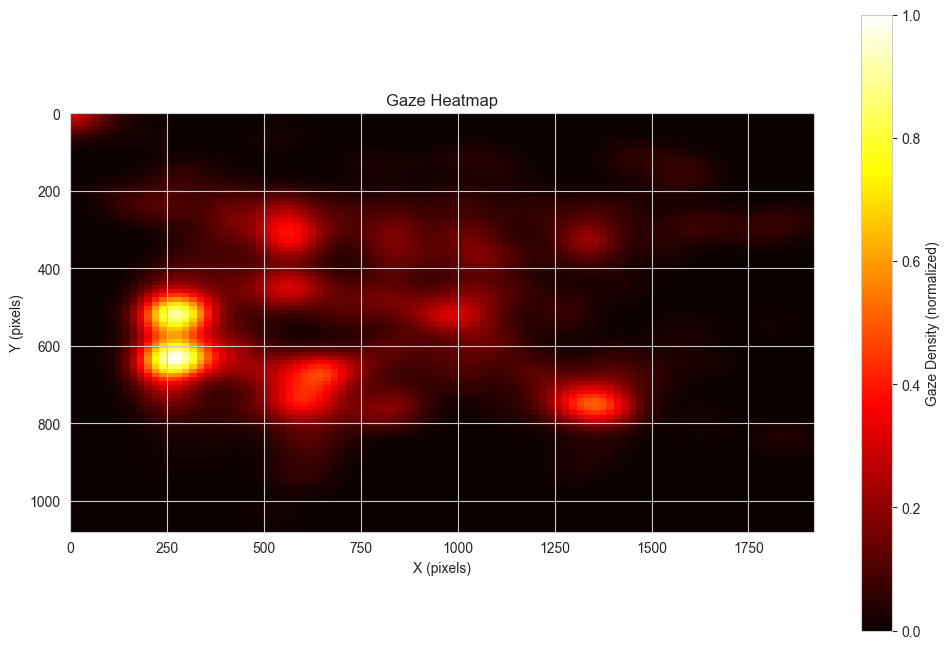

In [132]:
# Quick heatmap preview
plt.figure(figsize=(12, 8))
plt.imshow(heatmap, cmap='hot', extent=[0, SCREEN_WIDTH, SCREEN_HEIGHT, 0])
plt.colorbar(label='Gaze Density (normalized)')
plt.title('Gaze Heatmap')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()

## 7. AOI (Area of Interest) Analysis

Define regions on the screen and analyze gaze within each region.

In [133]:
# Define Areas of Interest
# Format: (x1, y1, x2, y2) in normalized coordinates (0-1)
# where (x1,y1) is top-left and (x2,y2) is bottom-right

aois = {
    "Top-Left": (0.0, 0.0, 0.5, 0.5),
    "Top-Right": (0.5, 0.0, 1.0, 0.5),
    "Bottom-Left": (0.0, 0.5, 0.5, 1.0),
    "Bottom-Right": (0.5, 0.5, 1.0, 1.0),
    "Center": (0.25, 0.25, 0.75, 0.75),
}

# Example for a typical UI layout:
# aois = {
#     "Header": (0.0, 0.0, 1.0, 0.1),
#     "Navigation": (0.0, 0.1, 0.2, 0.9),
#     "Content": (0.2, 0.1, 1.0, 0.9),
#     "Footer": (0.0, 0.9, 1.0, 1.0),
# }

print("Defined AOIs:")
for name, bounds in aois.items():
    x1, y1, x2, y2 = bounds
    print(f"  {name}: ({x1*SCREEN_WIDTH:.0f}, {y1*SCREEN_HEIGHT:.0f}) to ({x2*SCREEN_WIDTH:.0f}, {y2*SCREEN_HEIGHT:.0f})")

Defined AOIs:
  Top-Left: (0, 0) to (960, 540)
  Top-Right: (960, 0) to (1920, 540)
  Bottom-Left: (0, 540) to (960, 1080)
  Bottom-Right: (960, 540) to (1920, 1080)
  Center: (480, 270) to (1440, 810)


In [134]:
# Load AOIs from hacker_news_aois.json
import json

with open('../data/raw/aoi/hacker_news_aois.json', 'r') as f:
    hacker_news_aoi_data = json.load(f)

# Convert the JSON format to the AOI format used by the analyzer
# The JSON contains elements with bounds_normalized [x1, y1, x2, y2]
hacker_news_aois = {}
for entry in hacker_news_aoi_data:
    for element in entry.get('elements', []):
        name = element.get('name', 'unknown')
        bounds_norm = element.get('bounds_normalized', [0, 0, 1, 1])
        # Convert from [x1, y1, x2, y2] to (x1, y1, x2, y2) tuple
        hacker_news_aois[name] = tuple(bounds_norm)

print(f"Loaded {len(hacker_news_aois)} AOIs from hacker_news_aois.json")
print(f"Source URL: {hacker_news_aoi_data[0].get('url', 'unknown')}")
print(f"Viewport: {hacker_news_aoi_data[0].get('viewport_size', 'unknown')}")
print("\nSample AOIs:")
for i, (name, bounds) in enumerate(list(hacker_news_aois.items())[:5]):
    print(f"  {name}: {bounds}")

Loaded 40 AOIs from hacker_news_aois.json
Source URL: https://ardshinbank.am/
Viewport: [1920, 941]

Sample AOIs:
  navigation_tw-mb-3_0: (0.0, 0.0, 1.0, 0.14240170031880978)
  navigation_main-header_1: (0.0, 0.06801275239107332, 1.0, 0.14240170031880978)
  button_q-btn_1: (0.7817708333333333, 0.012752391073326248, 0.8067708333333333, 0.04569606801275239)
  button_q-btn_2: (0.8234375, 0.012752391073326248, 0.8708333333333333, 0.04569606801275239)
  button_q-btn_3: (0.88125, 0.012752391073326248, 0.8916666666666667, 0.04569606801275239)


In [136]:
# Analyze AOIs
aoi_results = analyzer.analyze_aoi(hacker_news_aois)

print("AOI Analysis Results:\n")
for aoi_name, metrics in aoi_results.items():
    print(f"{aoi_name}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"    {metric}: {value:.3f}")
        else:
            print(f"    {metric}: {value}")
    print()

AOI Analysis Results:

navigation_tw-mb-3_0:
    fixation_count: 25
    total_dwell_time: 4.072
    mean_fixation_duration: 0.163
    first_fixation_time: 14.446
    percentage_of_fixations: 3.521

navigation_main-header_1:
    fixation_count: 13
    total_dwell_time: 2.450
    mean_fixation_duration: 0.188
    first_fixation_time: 14.446
    percentage_of_fixations: 1.831

button_q-btn_1:
    fixation_count: 0
    total_dwell_time: 0
    mean_fixation_duration: 0
    first_fixation_time: None
    percentage_of_fixations: 0

button_q-btn_2:
    fixation_count: 0
    total_dwell_time: 0
    mean_fixation_duration: 0
    first_fixation_time: None
    percentage_of_fixations: 0

button_q-btn_3:
    fixation_count: 0
    total_dwell_time: 0
    mean_fixation_duration: 0
    first_fixation_time: None
    percentage_of_fixations: 0

link_active-link_0:
    fixation_count: 0
    total_dwell_time: 0
    mean_fixation_duration: 0
    first_fixation_time: None
    percentage_of_fixations: 0

lin

In [137]:
# Analyze AOIs from hacker_news_aois.json
hacker_news_aoi_results = analyzer.analyze_aoi(hacker_news_aois)

print("Hacker News AOI Analysis Results:\n")

# Show only AOIs that have fixations
aois_with_fixations = {k: v for k, v in hacker_news_aoi_results.items() if v.get('fixation_count', 0) > 0}
print(f"AOIs with fixations: {len(aois_with_fixations)} out of {len(hacker_news_aoi_results)}\n")

for aoi_name, metrics in list(aois_with_fixations.items())[:10]:
    print(f"{aoi_name}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"    {metric}: {value:.3f}")
        else:
            print(f"    {metric}: {value}")
    print()

Hacker News AOI Analysis Results:

AOIs with fixations: 16 out of 40

navigation_tw-mb-3_0:
    fixation_count: 25
    total_dwell_time: 4.072
    mean_fixation_duration: 0.163
    first_fixation_time: 14.446
    percentage_of_fixations: 3.521

navigation_main-header_1:
    fixation_count: 13
    total_dwell_time: 2.450
    mean_fixation_duration: 0.188
    first_fixation_time: 14.446
    percentage_of_fixations: 1.831

image_tw-inline_10:
    fixation_count: 1
    total_dwell_time: 0.123
    mean_fixation_duration: 0.123
    first_fixation_time: 140.058
    percentage_of_fixations: 0.141

image_tw-absolute_11:
    fixation_count: 40
    total_dwell_time: 10.270
    mean_fixation_duration: 0.257
    first_fixation_time: 6.540
    percentage_of_fixations: 5.634

image_tw-h-[40px]_12:
    fixation_count: 1
    total_dwell_time: 0.103
    mean_fixation_duration: 0.103
    first_fixation_time: 122.759
    percentage_of_fixations: 0.141

image_tw-h-[40px]_18:
    fixation_count: 1
    total

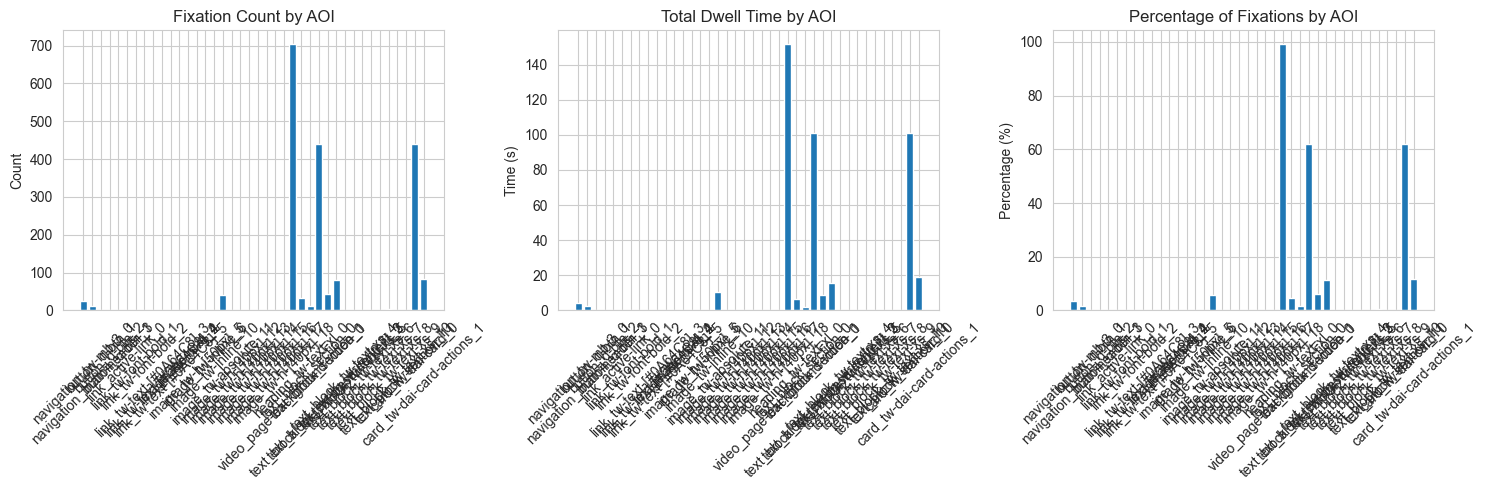

In [138]:
# AOI comparison chart
aoi_df = pd.DataFrame(aoi_results).T

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Fixation count
axes[0].bar(aoi_df.index, aoi_df['fixation_count'])
axes[0].set_title('Fixation Count by AOI')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Dwell time
axes[1].bar(aoi_df.index, aoi_df['total_dwell_time'])
axes[1].set_title('Total Dwell Time by AOI')
axes[1].set_ylabel('Time (s)')
axes[1].tick_params(axis='x', rotation=45)

# Percentage of fixations
axes[2].bar(aoi_df.index, aoi_df['percentage_of_fixations'])
axes[2].set_title('Percentage of Fixations by AOI')
axes[2].set_ylabel('Percentage (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Pupil Analysis

Analyze pupil diameter changes over time (indicator of cognitive load).

In [139]:
# Pupil statistics
pupil_stats = analyzer.get_pupil_stats()
print("Pupil Statistics:")
for key, value in pupil_stats.items():
    print(f"  {key}: {value:.3f} mm")

Pupil Statistics:
  left_pupil_mean: 2.514 mm
  left_pupil_std: 0.304 mm
  right_pupil_mean: 2.582 mm
  right_pupil_std: 0.308 mm
  combined_pupil_mean: 2.543 mm
  combined_pupil_std: 0.315 mm


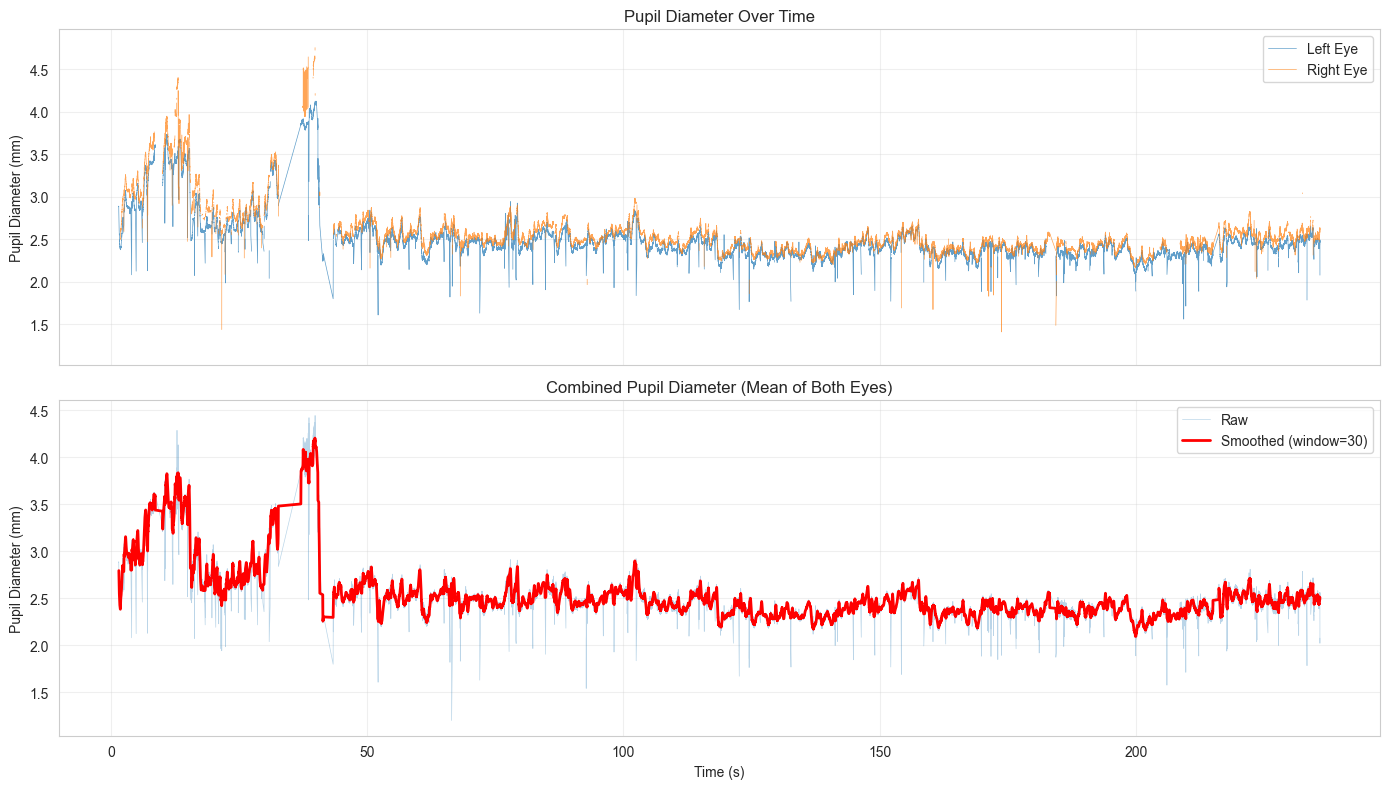

In [140]:
# Pupil diameter over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

time_col = 'recording_timestamp' if 'recording_timestamp' in analyzer.data.columns else analyzer.data.index

# Left and right pupils
if 'left_pupil_diameter' in analyzer.data.columns:
    axes[0].plot(analyzer.data['recording_timestamp'], 
                 analyzer.data['left_pupil_diameter'], 
                 label='Left Eye', alpha=0.7, linewidth=0.5)
if 'right_pupil_diameter' in analyzer.data.columns:
    axes[0].plot(analyzer.data['recording_timestamp'], 
                 analyzer.data['right_pupil_diameter'], 
                 label='Right Eye', alpha=0.7, linewidth=0.5)

axes[0].set_ylabel('Pupil Diameter (mm)')
axes[0].set_title('Pupil Diameter Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Combined pupil with rolling average
if 'pupil_diameter' in analyzer.data.columns:
    axes[1].plot(analyzer.data['recording_timestamp'], 
                 analyzer.data['pupil_diameter'], 
                 alpha=0.3, linewidth=0.5, label='Raw')
    
    # Rolling average (smoothed)
    window = 30  # samples
    smoothed = analyzer.data['pupil_diameter'].rolling(window=window, center=True).mean()
    axes[1].plot(analyzer.data['recording_timestamp'], smoothed, 
                 'r-', linewidth=2, label=f'Smoothed (window={window})')

axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Pupil Diameter (mm)')
axes[1].set_title('Combined Pupil Diameter (Mean of Both Eyes)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

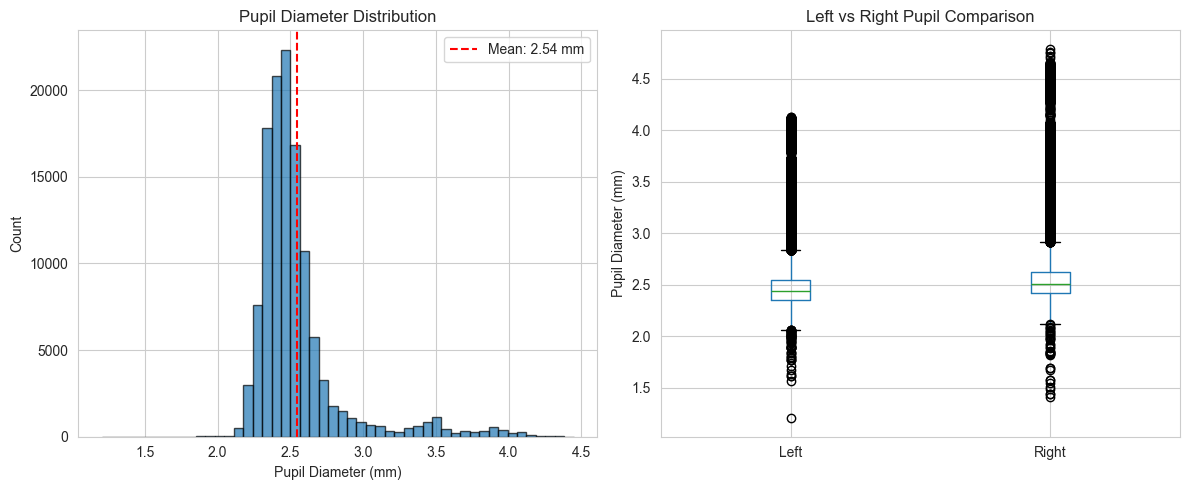

In [141]:
# Pupil diameter distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

if 'pupil_diameter' in analyzer.data.columns:
    pupil_data = analyzer.data['pupil_diameter'].dropna()
    
    # Histogram
    axes[0].hist(pupil_data, bins=50, edgecolor='black', alpha=0.7)
    axes[0].axvline(pupil_data.mean(), color='red', linestyle='--', 
                    label=f'Mean: {pupil_data.mean():.2f} mm')
    axes[0].set_xlabel('Pupil Diameter (mm)')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Pupil Diameter Distribution')
    axes[0].legend()
    
    # Box plot comparing left and right
    pupil_comparison = pd.DataFrame({
        'Left': analyzer.data['left_pupil_diameter'],
        'Right': analyzer.data['right_pupil_diameter']
    })
    pupil_comparison.boxplot(ax=axes[1])
    axes[1].set_ylabel('Pupil Diameter (mm)')
    axes[1].set_title('Left vs Right Pupil Comparison')

plt.tight_layout()
plt.show()

## 9. Visualizations

Create publication-ready visualizations.

In [142]:
# Initialize visualizer
viz = TobiiVisualizer(screen_size=(SCREEN_WIDTH, SCREEN_HEIGHT))

# Optional: Set background image (e.g., screenshot of stimulus)
# viz.set_background("path/to/stimulus_screenshot.png")

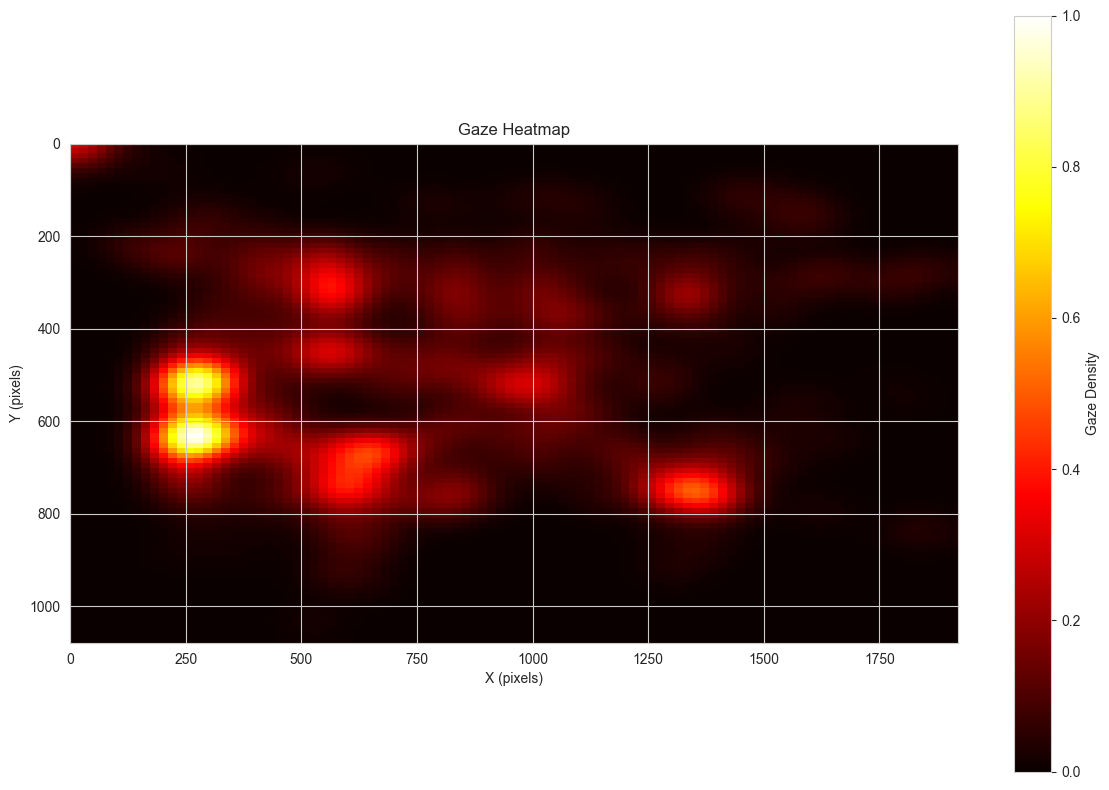

In [143]:
# Heatmap visualization
fig = viz.plot_heatmap(
    heatmap,
    title="Gaze Heatmap",
    cmap="hot",
    alpha=0.7,
    # save_path="../data/processed/tobii/heatmap.png"  # Uncomment to save
)
plt.show()

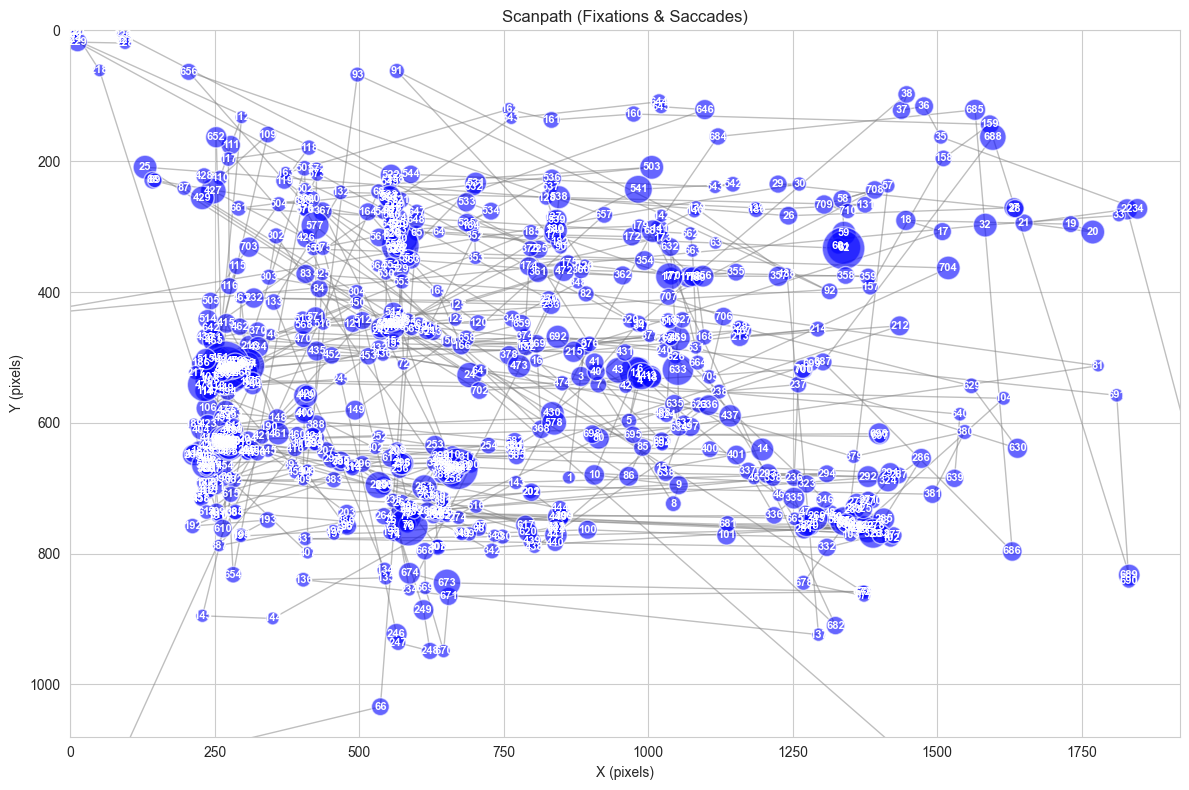

In [144]:
# Scanpath visualization
fig = viz.plot_scanpath(
    fixations,
    title="Scanpath (Fixations & Saccades)",
    show_order=True,
    fixation_color="blue",
    duration_scale=800,  # Adjust circle size scaling
    # save_path="../data/processed/tobii/scanpath.png"
)
plt.show()

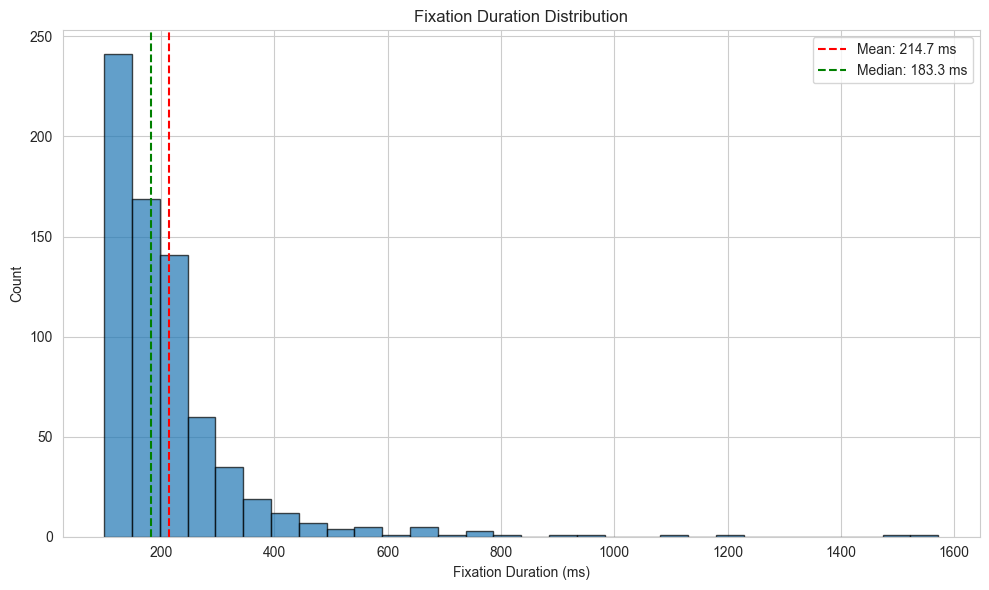

In [145]:
# Fixation duration histogram
fig = viz.plot_fixation_duration_histogram(
    fixations,
    bins=30,
    title="Fixation Duration Distribution"
)
plt.show()

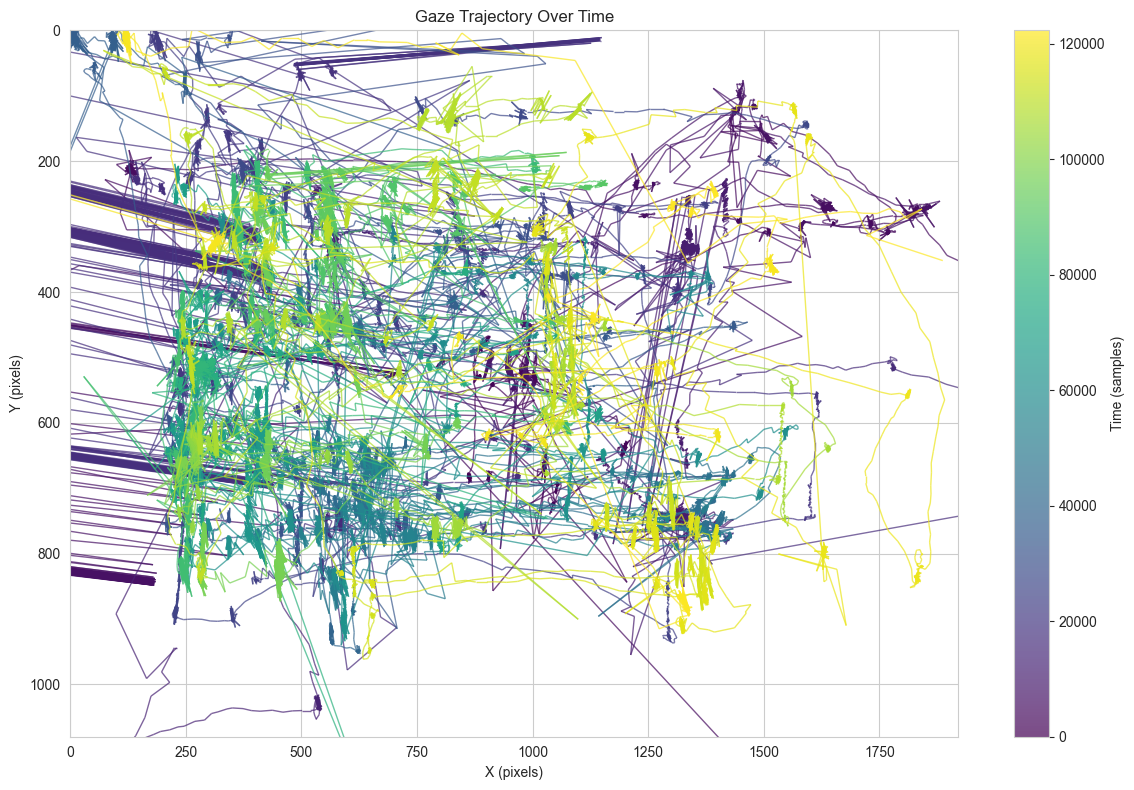

In [146]:
# Gaze trajectory colored by time
fig = viz.plot_gaze_trajectory(
    analyzer.data,
    title="Gaze Trajectory Over Time",
    colorby="time"
)
plt.show()

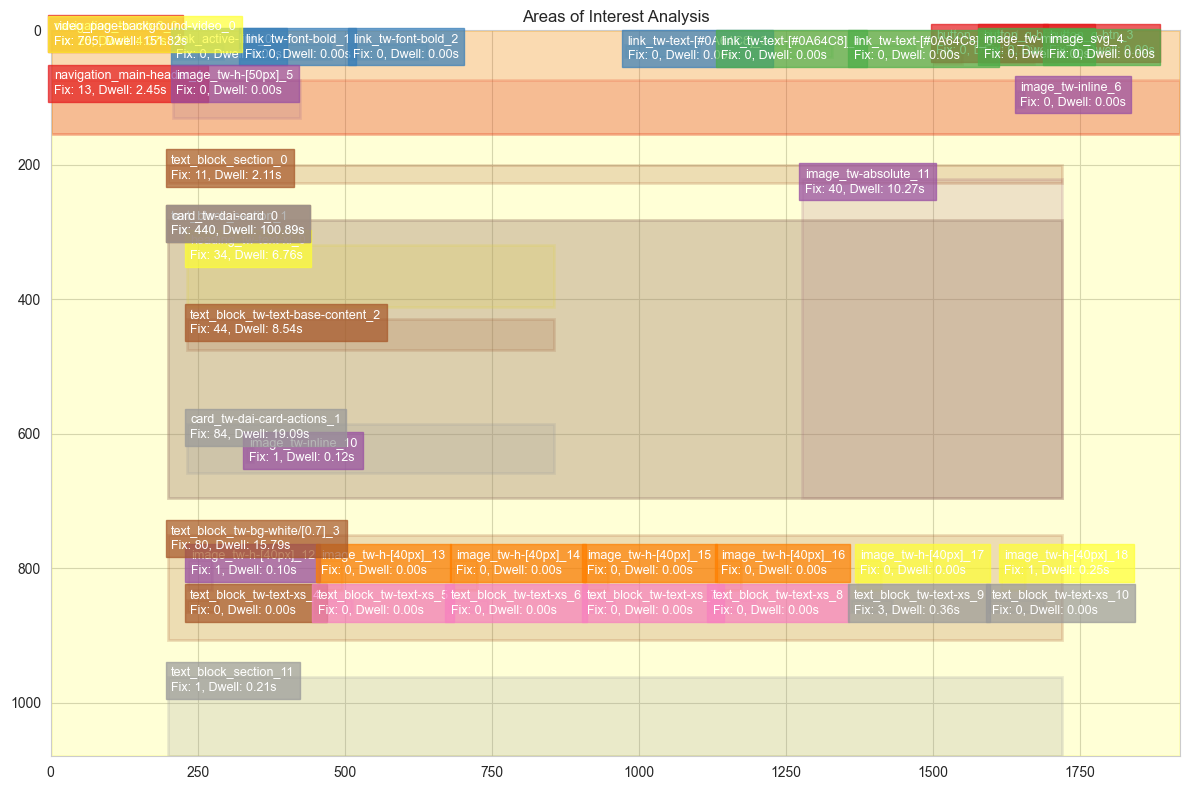

In [147]:
# AOI overlay with results
fig = viz.plot_aoi_overlay(
    hacker_news_aois,
    aoi_results=aoi_results,
    title="Areas of Interest Analysis"
)
plt.show()

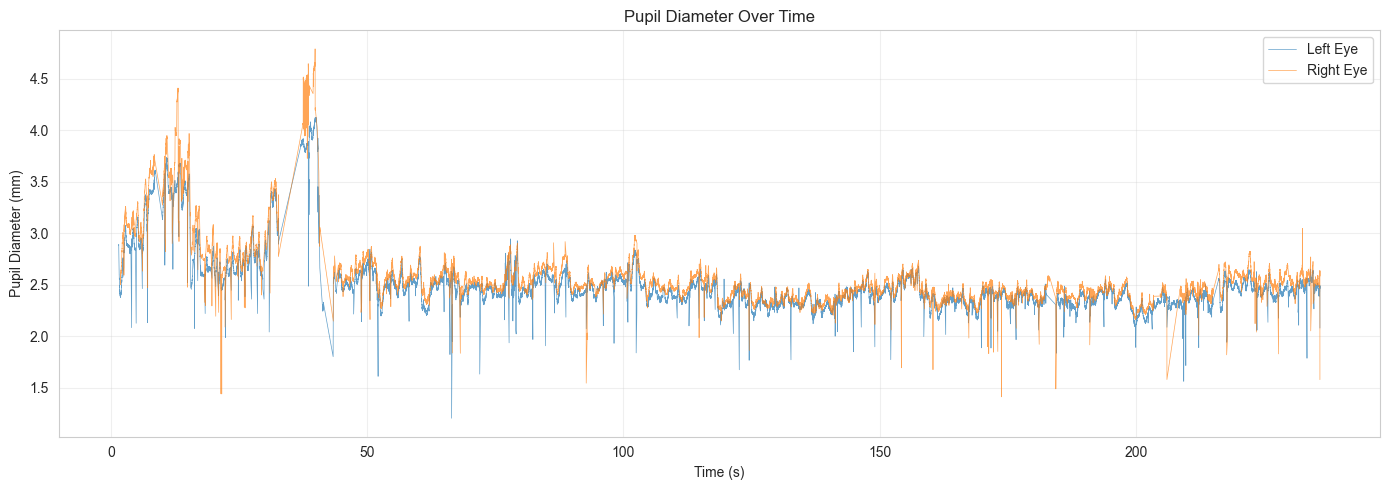

In [148]:
# Pupil timeseries
fig = viz.plot_pupil_timeseries(
    analyzer.data,
    title="Pupil Diameter Over Time"
)
plt.show()

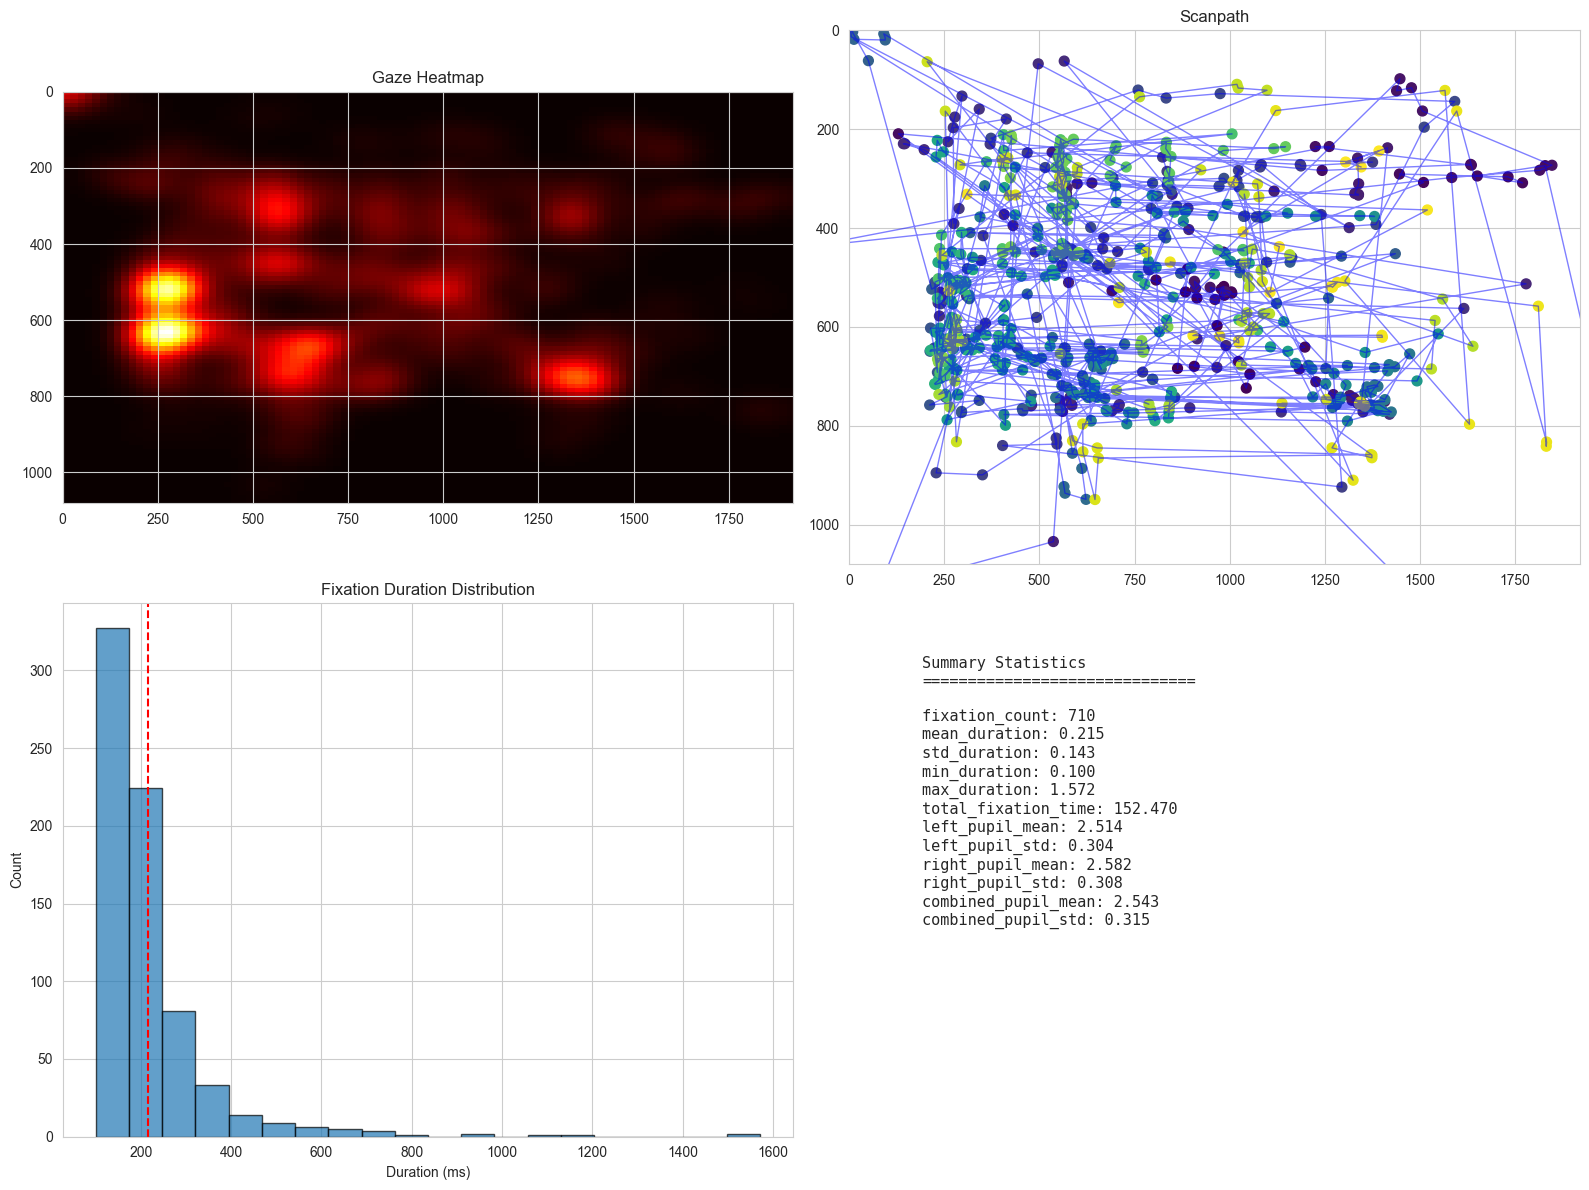

In [149]:
# Summary dashboard
all_stats = {**analyzer.get_fixation_stats(), **analyzer.get_pupil_stats()}

fig = viz.create_summary_dashboard(
    analyzer.data,
    fixations,
    heatmap,
    all_stats,
    # save_path="../data/processed/tobii/dashboard.png"
)
plt.show()

### Interactive Visualizations (Plotly)

In [150]:
# Interactive heatmap
try:
    fig = viz.plot_interactive_heatmap(heatmap, title="Interactive Gaze Heatmap")
    fig.show()
except ImportError:
    print("Plotly not installed. Run: pip install plotly")

In [151]:
# Interactive scanpath
try:
    fig = viz.plot_interactive_scanpath(fixations, title="Interactive Scanpath")
    fig.show()
except ImportError:
    print("Plotly not installed. Run: pip install plotly")

## 10. Export Results

Save analysis results for further processing or reporting.

In [152]:
# Create output directory
output_dir = project_root / "data" / "processed" / "tobii"
output_dir.mkdir(parents=True, exist_ok=True)

# Export fixations
fixation_df = analyzer.get_fixations_dataframe()
fixation_df.to_csv(output_dir / "fixations.csv", index=False)
print(f"Exported fixations: {len(fixation_df)} rows")

# Export saccades
saccade_df = analyzer.get_saccades_dataframe()
saccade_df.to_csv(output_dir / "saccades.csv", index=False)
print(f"Exported saccades: {len(saccade_df)} rows")

# Export AOI results
aoi_df = pd.DataFrame(aoi_results).T
aoi_df.to_csv(output_dir / "aoi_results.csv")
print(f"Exported AOI results: {len(aoi_df)} AOIs")

# Export statistics
all_stats = {
    **analyzer.get_fixation_stats(),
    **analyzer.get_saccade_stats(),
    **analyzer.get_pupil_stats()
}
stats_df = pd.DataFrame([all_stats])
stats_df.to_csv(output_dir / "statistics.csv", index=False)
print(f"Exported statistics")

# Export heatmap as numpy array
np.save(output_dir / "heatmap.npy", heatmap)
print(f"Exported heatmap array")

print(f"\nAll results saved to: {output_dir}")

Exported fixations: 710 rows
Exported saccades: 709 rows
Exported AOI results: 40 AOIs
Exported statistics
Exported heatmap array

All results saved to: /Users/yenokhakobyan/HCI Lab ToolKit/data/processed/tobii


In [153]:
# Summary report
print("="*60)
print("TOBII EYE TRACKING ANALYSIS REPORT")
print("="*60)
print(f"\nData File: {DATA_FILE}")
print(f"Screen Size: {SCREEN_WIDTH} x {SCREEN_HEIGHT}")
print(f"Total Samples: {len(analyzer.data)}")

if 'recording_timestamp' in analyzer.data.columns:
    duration = analyzer.data['recording_timestamp'].max() - analyzer.data['recording_timestamp'].min()
    print(f"Recording Duration: {duration:.2f} seconds")
    print(f"Effective Sample Rate: {len(analyzer.data)/duration:.1f} Hz")

print(f"\nFIXATION ANALYSIS")
print("-"*40)
for key, value in analyzer.get_fixation_stats().items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

print(f"\nSACCADE ANALYSIS")
print("-"*40)
for key, value in analyzer.get_saccade_stats().items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

print(f"\nPUPIL ANALYSIS")
print("-"*40)
for key, value in analyzer.get_pupil_stats().items():
    print(f"  {key}: {value:.3f} mm")

print(f"\nAOI ANALYSIS")
print("-"*40)
for aoi_name, metrics in aoi_results.items():
    print(f"  {aoi_name}: {metrics['fixation_count']} fixations, {metrics['total_dwell_time']:.2f}s dwell time")

print("\n" + "="*60)

TOBII EYE TRACKING ANALYSIS REPORT

Data File: ../data/raw/tobii/data_from_tobii_example_converted.csv
Screen Size: 1920 x 1080
Total Samples: 122282
Recording Duration: 234.36 seconds
Effective Sample Rate: 521.8 Hz

FIXATION ANALYSIS
----------------------------------------
  fixation_count: 710
  mean_duration: 0.2147
  std_duration: 0.1425
  min_duration: 0.1000
  max_duration: 1.5716
  total_fixation_time: 152.4699

SACCADE ANALYSIS
----------------------------------------
  saccade_count: 709
  mean_amplitude: 0.1226
  std_amplitude: 0.1612
  mean_velocity: 5.3261
  mean_duration: 0.1155

PUPIL ANALYSIS
----------------------------------------
  left_pupil_mean: 2.514 mm
  left_pupil_std: 0.304 mm
  right_pupil_mean: 2.582 mm
  right_pupil_std: 0.308 mm
  combined_pupil_mean: 2.543 mm
  combined_pupil_std: 0.315 mm

AOI ANALYSIS
----------------------------------------
  navigation_tw-mb-3_0: 25 fixations, 4.07s dwell time
  navigation_main-header_1: 13 fixations, 2.45s dwell tim

## Next Steps

- **Compare conditions**: Load multiple recordings and compare metrics
- **Statistical analysis**: Use `scipy.stats` or `statsmodels` for significance testing
- **Machine learning**: Use fixation patterns for classification tasks
- **Synchronize with other data**: Combine with EEG, GSR, or behavioral data

---

# Advanced Analysis (Tobii Pro Lab Inspired)

The following sections demonstrate state-of-the-art eye tracking metrics and analysis techniques inspired by Tobii Pro Lab and current research literature.

## 11. Data Quality Assessment

Comprehensive data quality metrics following Tobii Pro Lab standards.

In [154]:
# Compute comprehensive data quality metrics
quality_metrics = analyzer.compute_data_quality_metrics()

print("DATA QUALITY REPORT")
print("=" * 50)
print(f"\nSampling:")
print(f"  Total samples: {quality_metrics['total_samples']}")
print(f"  Sampling rate: {quality_metrics['sampling_rate']:.1f} Hz")
print(f"  Sampling jitter: {quality_metrics['sampling_jitter']:.4f}")

print(f"\nValidity:")
print(f"  Left eye validity: {quality_metrics['left_eye_validity']*100:.1f}%")
print(f"  Right eye validity: {quality_metrics['right_eye_validity']*100:.1f}%")
print(f"  Binocular validity: {quality_metrics['binocular_validity']*100:.1f}%")
print(f"  Overall validity: {quality_metrics['overall_validity']*100:.1f}%")

print(f"\nData Loss:")
print(f"  Number of gaps: {quality_metrics['gap_count']}")
print(f"  Mean gap length: {quality_metrics['mean_gap_length']:.1f} samples")
print(f"  Max gap length: {quality_metrics['max_gap_length']} samples")

print(f"\nPrecision:")
print(f"  RMS precision: {quality_metrics['precision_rms']:.6f} (normalized)")

DATA QUALITY REPORT

Sampling:
  Total samples: 122282
  Sampling rate: 599.9 Hz
  Sampling jitter: 9.3297

Validity:
  Left eye validity: 95.7%
  Right eye validity: 80.1%
  Binocular validity: 75.8%
  Overall validity: 95.7%

Data Loss:
  Number of gaps: 0
  Mean gap length: 0.0 samples
  Max gap length: 0 samples

Precision:
  RMS precision: 0.004771 (normalized)


## 12. Ambient/Focal Attention Analysis (K Coefficient)

The K coefficient measures the balance between **ambient** (global, exploratory) and **focal** (detailed, analytical) visual attention modes.

- **K > 0 (Focal)**: Long fixations with short saccades - detailed processing
- **K < 0 (Ambient)**: Short fixations with long saccades - global scanning

Reference: Krejtz et al. (2016)

In [155]:
# Compute K coefficient
k_results = analyzer.compute_k_coefficient()

print("AMBIENT/FOCAL ATTENTION ANALYSIS")
print("=" * 50)
print(f"\nK Coefficient: {k_results['k_coefficient']:.4f}")
print(f"K Std Dev: {k_results['k_std']:.4f}")
print(f"\nAttention Mode: {k_results['attention_mode'].upper()}")
print(f"  Focal ratio: {k_results['focal_ratio']*100:.1f}%")
print(f"  Ambient ratio: {k_results['ambient_ratio']*100:.1f}%")

# Interpretation
if k_results['attention_mode'] == 'focal':
    print("\nInterpretation: Participant showed predominantly focal/detailed processing")
    print("(characteristic of reading, searching for specific information)")
elif k_results['attention_mode'] == 'ambient':
    print("\nInterpretation: Participant showed predominantly ambient/global processing")
    print("(characteristic of scene perception, orientation)")
else:
    print("\nInterpretation: Mixed attention mode - balanced between focal and ambient")

AMBIENT/FOCAL ATTENTION ANALYSIS

K Coefficient: 0.0000
K Std Dev: 1.4515

Attention Mode: MIXED
  Focal ratio: 53.3%
  Ambient ratio: 46.7%

Interpretation: Mixed attention mode - balanced between focal and ambient


## 13. Scanpath Entropy Analysis

Entropy measures the predictability/randomness of gaze patterns:
- **Stationary entropy**: How evenly distributed are fixations across AOIs?
- **Transition entropy**: How predictable are transitions between AOIs?

Higher entropy = more random/exploratory behavior
Lower entropy = more structured/predictable scanning

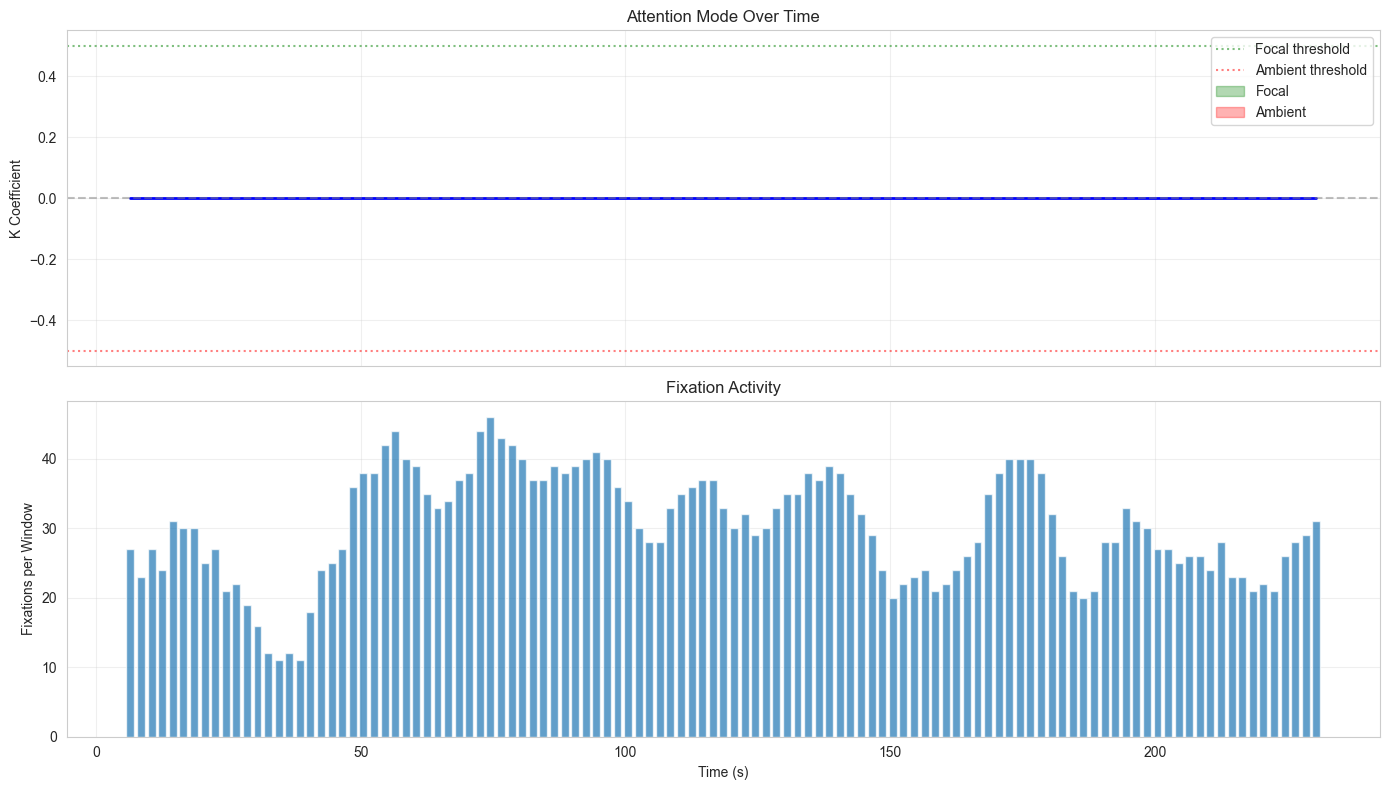

In [156]:
# K coefficient over time (sliding window analysis)
k_over_time = analyzer.compute_k_coefficient_over_time(window_size=10.0, step_size=2.0)

if not k_over_time.empty:
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    # K coefficient over time
    axes[0].plot(k_over_time['time'], k_over_time['k_coefficient'], 'b-', linewidth=2)
    axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[0].axhline(y=0.5, color='green', linestyle=':', alpha=0.5, label='Focal threshold')
    axes[0].axhline(y=-0.5, color='red', linestyle=':', alpha=0.5, label='Ambient threshold')
    axes[0].fill_between(k_over_time['time'], 0, k_over_time['k_coefficient'], 
                         where=k_over_time['k_coefficient'] > 0, alpha=0.3, color='green', label='Focal')
    axes[0].fill_between(k_over_time['time'], 0, k_over_time['k_coefficient'], 
                         where=k_over_time['k_coefficient'] < 0, alpha=0.3, color='red', label='Ambient')
    axes[0].set_ylabel('K Coefficient')
    axes[0].set_title('Attention Mode Over Time')
    axes[0].legend(loc='upper right')
    axes[0].grid(True, alpha=0.3)
    
    # Activity count (fixations per window)
    axes[1].bar(k_over_time['time'], k_over_time['n_fixations'], width=1.5, alpha=0.7)
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Fixations per Window')
    axes[1].set_title('Fixation Activity')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for time-series K coefficient analysis")

## 14. AOI Transition Matrix

Visualize how gaze transitions between different areas of interest. This reveals scanning patterns and visual strategies.

In [158]:
# Compute scanpath entropy
entropy_results = analyzer.compute_scanpath_entropy(hacker_news_aois)

print("SCANPATH ENTROPY ANALYSIS")
print("=" * 50)
print(f"\nStationary Entropy: {entropy_results['stationary_entropy']:.4f}")
print(f"Normalized Stationary Entropy: {entropy_results['normalized_stationary_entropy']:.4f}")
print(f"\nTransition Entropy: {entropy_results['transition_entropy']:.4f}")
print(f"Normalized Transition Entropy: {entropy_results['normalized_transition_entropy']:.4f}")

# AOI sequence summary
from collections import Counter
aoi_counts = Counter(entropy_results['aoi_sequence'])
print(f"\nAOI Visit Distribution:")
for aoi, count in sorted(aoi_counts.items(), key=lambda x: -x[1]):
    pct = count / len(entropy_results['aoi_sequence']) * 100
    print(f"  {aoi}: {count} ({pct:.1f}%)")

SCANPATH ENTROPY ANALYSIS

Stationary Entropy: 0.6346
Normalized Stationary Entropy: 0.1184

Transition Entropy: 1.1137
Normalized Transition Entropy: 0.2577

AOI Visit Distribution:
  video_page-background-video_0: 637 (89.7%)
  image_tw-absolute_11: 40 (5.6%)
  navigation_tw-mb-3_0: 25 (3.5%)
  outside: 5 (0.7%)
  image_tw-h-[40px]_12: 1 (0.1%)
  image_tw-inline_10: 1 (0.1%)
  image_tw-h-[40px]_18: 1 (0.1%)


## 15. Advanced AOI Metrics

Extended AOI analysis with Tobii Pro Lab-style metrics including:
- Time to First Fixation (TTFF)
- First Fixation Duration
- Visit and revisit counts
- Glances (short visits < 150ms)

In [159]:
# Advanced AOI analysis
advanced_aoi = analyzer.analyze_aoi_advanced(hacker_news_aois)

# Create detailed report
print("ADVANCED AOI ANALYSIS")
print("=" * 70)

for aoi_name, metrics in advanced_aoi.items():
    print(f"\n{aoi_name}:")
    print("-" * 40)
    print(f"  Fixations: {metrics['fixation_count']}")
    print(f"  Total Dwell Time: {metrics['total_dwell_time']:.3f}s")
    print(f"  Mean Fixation Duration: {metrics['mean_fixation_duration']*1000:.1f}ms")
    
    ttff = metrics['time_to_first_fixation']
    print(f"  Time to First Fixation: {ttff*1000:.1f}ms" if ttff else "  Time to First Fixation: N/A")
    
    ffd = metrics['first_fixation_duration']
    print(f"  First Fixation Duration: {ffd*1000:.1f}ms" if ffd else "  First Fixation Duration: N/A")
    
    print(f"  Visits: {metrics['visit_count']}")
    print(f"  Revisits: {metrics['revisit_count']}")
    print(f"  Glances (<150ms): {metrics['glance_count']}")
    print(f"  % of All Fixations: {metrics['percentage_of_fixations']:.1f}%")

ADVANCED AOI ANALYSIS

navigation_tw-mb-3_0:
----------------------------------------
  Fixations: 25
  Total Dwell Time: 4.072s
  Mean Fixation Duration: 162.9ms
  Time to First Fixation: 12923.2ms
  First Fixation Duration: 236.7ms
  Visits: 12
  Revisits: 11
  Glances (<150ms): 4
  % of All Fixations: 3.5%

navigation_main-header_1:
----------------------------------------
  Fixations: 13
  Total Dwell Time: 2.450s
  Mean Fixation Duration: 188.5ms
  Time to First Fixation: 12923.2ms
  First Fixation Duration: 236.7ms
  Visits: 5
  Revisits: 4
  Glances (<150ms): 1
  % of All Fixations: 1.8%

button_q-btn_1:
----------------------------------------
  Fixations: 0
  Total Dwell Time: 0.000s
  Mean Fixation Duration: 0.0ms
  Time to First Fixation: N/A
  First Fixation Duration: N/A
  Visits: 0
  Revisits: 0
  Glances (<150ms): 0
  % of All Fixations: 0.0%

button_q-btn_2:
----------------------------------------
  Fixations: 0
  Total Dwell Time: 0.000s
  Mean Fixation Duration: 0.0m

IndexError: index 6 is out of bounds for axis 1 with size 6

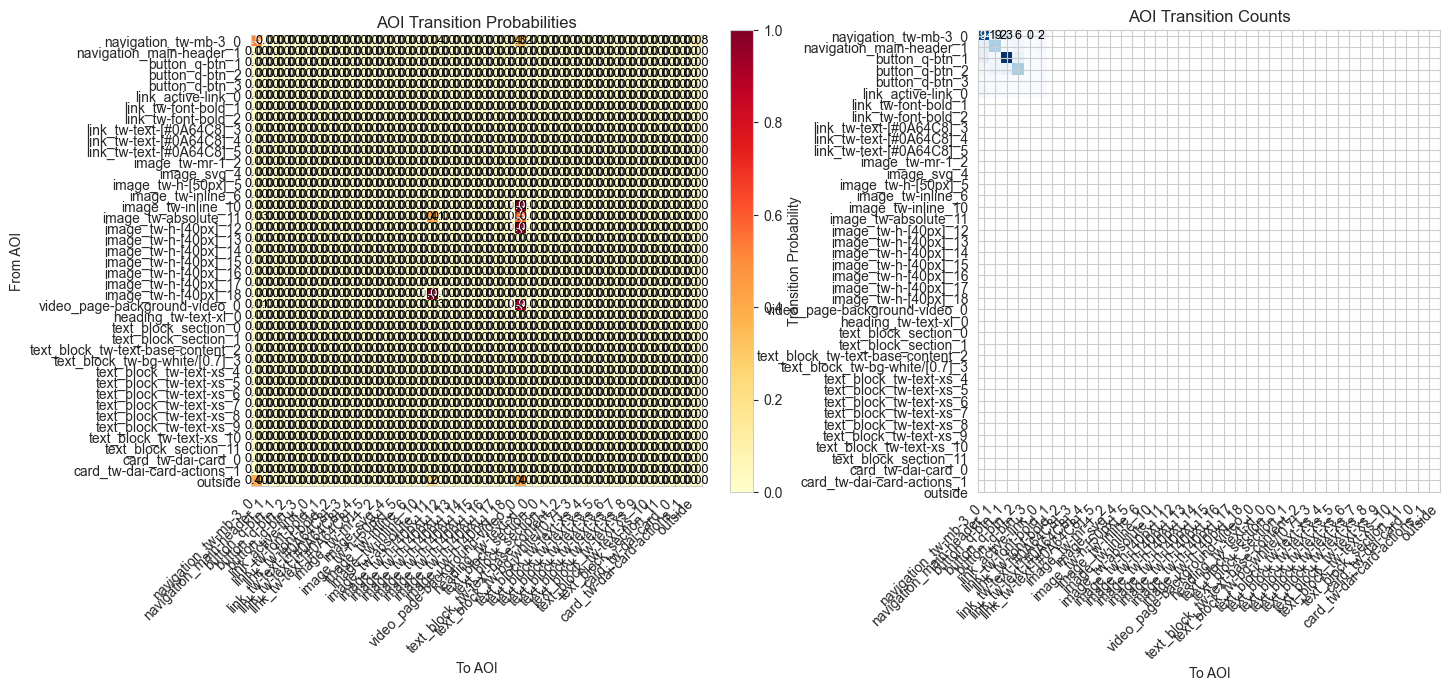

In [160]:
# Compute and visualize transition matrix
transition_matrix, aoi_labels = analyzer.compute_aoi_transition_matrix(hacker_news_aois, normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Normalized (probability) matrix
im1 = axes[0].imshow(transition_matrix, cmap='YlOrRd', vmin=0, vmax=1)
axes[0].set_xticks(range(len(aoi_labels)))
axes[0].set_yticks(range(len(aoi_labels)))
axes[0].set_xticklabels(aoi_labels, rotation=45, ha='right')
axes[0].set_yticklabels(aoi_labels)
axes[0].set_xlabel('To AOI')
axes[0].set_ylabel('From AOI')
axes[0].set_title('AOI Transition Probabilities')

# Add text annotations
for i in range(len(aoi_labels)):
    for j in range(len(aoi_labels)):
        value = transition_matrix[i, j]
        color = 'white' if value > 0.5 else 'black'
        axes[0].text(j, i, f'{value:.2f}', ha='center', va='center', color=color, fontsize=9)

plt.colorbar(im1, ax=axes[0], label='Transition Probability')

# Raw count matrix
raw_matrix, _ = analyzer.compute_aoi_transition_matrix(aois, normalize=False)
im2 = axes[1].imshow(raw_matrix, cmap='Blues')
axes[1].set_xticks(range(len(aoi_labels)))
axes[1].set_yticks(range(len(aoi_labels)))
axes[1].set_xticklabels(aoi_labels, rotation=45, ha='right')
axes[1].set_yticklabels(aoi_labels)
axes[1].set_xlabel('To AOI')
axes[1].set_ylabel('From AOI')
axes[1].set_title('AOI Transition Counts')

# Add text annotations
for i in range(len(aoi_labels)):
    for j in range(len(aoi_labels)):
        value = int(raw_matrix[i, j])
        max_val = raw_matrix.max()
        color = 'white' if value > max_val * 0.5 else 'black'
        axes[1].text(j, i, f'{value}', ha='center', va='center', color=color, fontsize=9)

plt.colorbar(im2, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

## 16. Cognitive Load Indicators

Pupil-based measures of cognitive workload:

### Index of Cognitive Activity (ICA)
Measures rapid, small pupil fluctuations that correlate with cognitive effort. Based on Marshall (2002).

### Low/High Index of Pupillary Activity (LHIPA)
Spectral analysis of pupil oscillations:
- **Low frequency (0.04-0.15 Hz)**: Parasympathetic activity
- **High frequency (0.15-0.5 Hz)**: Cognitive/task demands

### Task-Evoked Pupillary Response (TEPR)
Measures pupil dilation relative to baseline as an indicator of cognitive load.

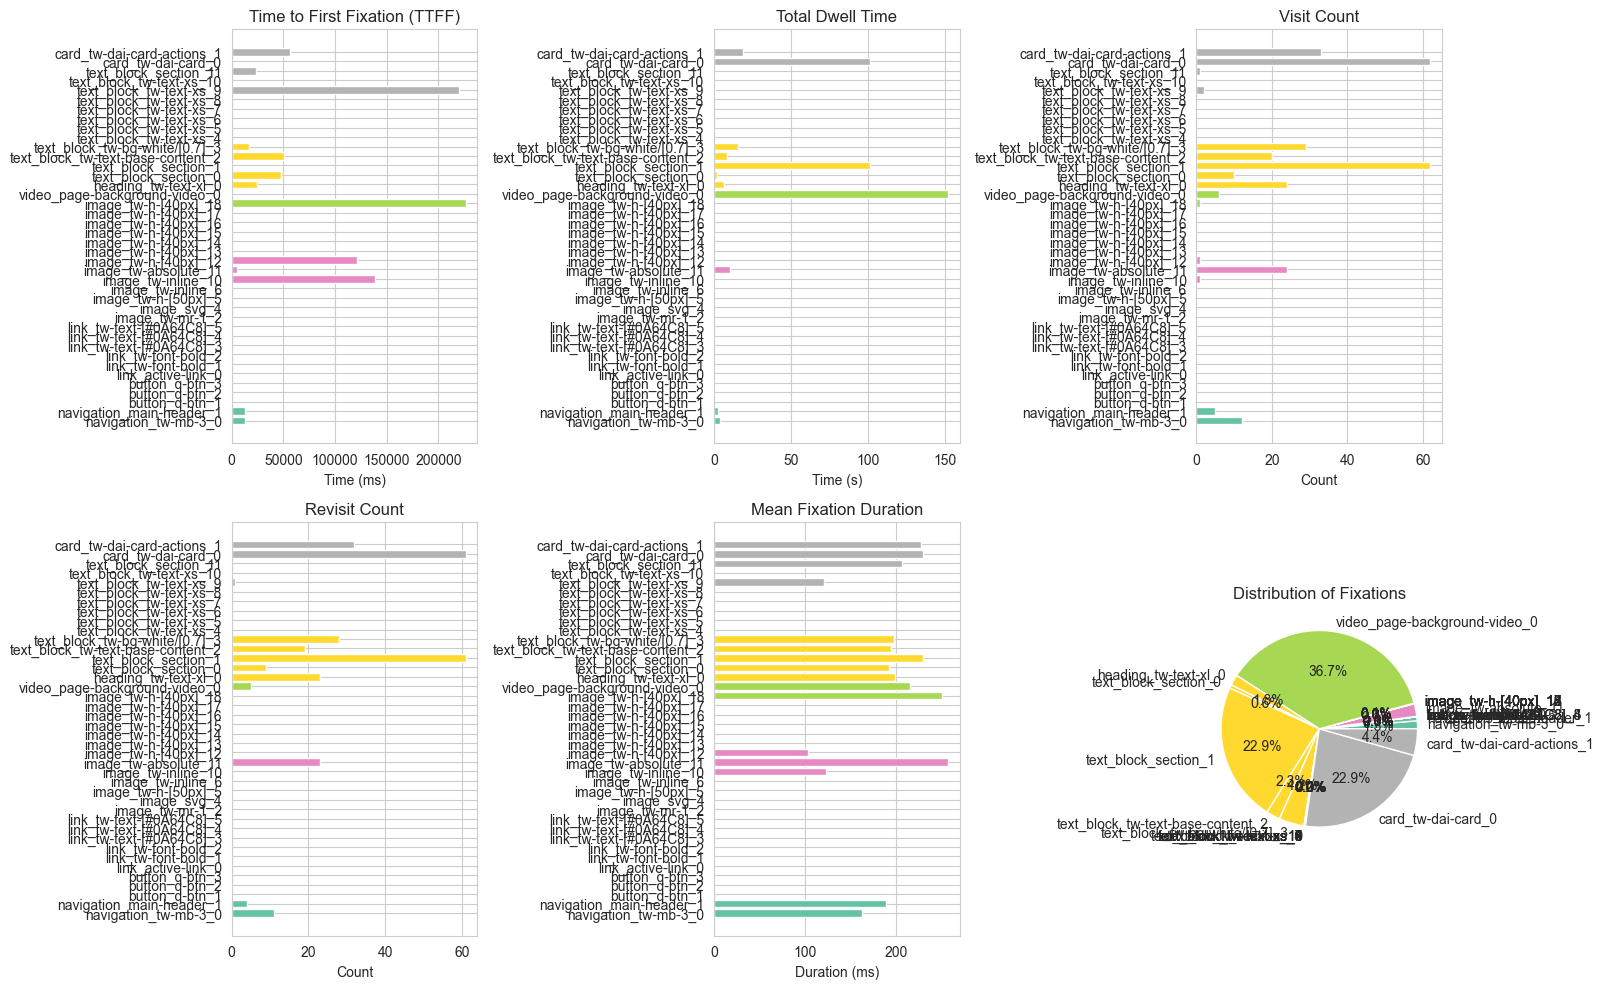

In [161]:
# Visualize advanced AOI metrics
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

aoi_names = list(advanced_aoi.keys())
colors = plt.cm.Set2(np.linspace(0, 1, len(aoi_names)))

# Time to First Fixation
ttff_values = [advanced_aoi[name]['time_to_first_fixation'] or 0 for name in aoi_names]
axes[0, 0].barh(aoi_names, [t*1000 for t in ttff_values], color=colors)
axes[0, 0].set_xlabel('Time (ms)')
axes[0, 0].set_title('Time to First Fixation (TTFF)')

# Total Dwell Time
dwell_values = [advanced_aoi[name]['total_dwell_time'] for name in aoi_names]
axes[0, 1].barh(aoi_names, dwell_values, color=colors)
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_title('Total Dwell Time')

# Visit Count
visit_values = [advanced_aoi[name]['visit_count'] for name in aoi_names]
axes[0, 2].barh(aoi_names, visit_values, color=colors)
axes[0, 2].set_xlabel('Count')
axes[0, 2].set_title('Visit Count')

# Revisit Count
revisit_values = [advanced_aoi[name]['revisit_count'] for name in aoi_names]
axes[1, 0].barh(aoi_names, revisit_values, color=colors)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Revisit Count')

# Mean Fixation Duration
mean_fix_values = [advanced_aoi[name]['mean_fixation_duration']*1000 for name in aoi_names]
axes[1, 1].barh(aoi_names, mean_fix_values, color=colors)
axes[1, 1].set_xlabel('Duration (ms)')
axes[1, 1].set_title('Mean Fixation Duration')

# Percentage of Fixations (Pie chart)
pct_values = [advanced_aoi[name]['percentage_of_fixations'] for name in aoi_names]
if sum(pct_values) > 0:
    axes[1, 2].pie(pct_values, labels=aoi_names, autopct='%1.1f%%', colors=colors)
    axes[1, 2].set_title('Distribution of Fixations')

plt.tight_layout()
plt.show()

In [162]:
# Compute cognitive load indicators
print("COGNITIVE LOAD ANALYSIS")
print("=" * 50)

# Index of Cognitive Activity
ica_results = analyzer.compute_index_of_cognitive_activity()
print("\nIndex of Cognitive Activity (ICA):")
print(f"  Combined ICA: {ica_results.get('ica', 'N/A'):.6f}" if not np.isnan(ica_results.get('ica', np.nan)) else "  Combined ICA: N/A")
if 'ica_left' in ica_results:
    print(f"  Left eye ICA: {ica_results['ica_left']:.6f}" if not np.isnan(ica_results['ica_left']) else "  Left eye ICA: N/A")
if 'ica_right' in ica_results:
    print(f"  Right eye ICA: {ica_results['ica_right']:.6f}" if not np.isnan(ica_results['ica_right']) else "  Right eye ICA: N/A")

# LHIPA (spectral analysis)
lhipa_results = analyzer.compute_lhipa()
print("\nLow/High Index of Pupillary Activity (LHIPA):")
print(f"  Low frequency power (LIPA): {lhipa_results['lipa']:.6f}" if not np.isnan(lhipa_results.get('lipa', np.nan)) else "  LIPA: N/A")
print(f"  High frequency power (HIPA): {lhipa_results['hipa']:.6f}" if not np.isnan(lhipa_results.get('hipa', np.nan)) else "  HIPA: N/A")
print(f"  LHIPA ratio: {lhipa_results['lhipa']:.4f}" if not np.isnan(lhipa_results.get('lhipa', np.nan)) else "  LHIPA ratio: N/A")
print(f"  Total power: {lhipa_results.get('total_power', 'N/A'):.6f}" if not np.isnan(lhipa_results.get('total_power', np.nan)) else "  Total power: N/A")

# Task-Evoked Pupillary Response
tepr_results = analyzer.compute_pupillary_response(baseline_duration=2.0)
print("\nTask-Evoked Pupillary Response (TEPR):")
print(f"  Baseline mean: {tepr_results['baseline_mean']:.3f} mm")
print(f"  Baseline std: {tepr_results['baseline_std']:.3f} mm")
if 'mean_tepr' in tepr_results:
    print(f"  Mean TEPR: {tepr_results['mean_tepr']:.2f}% change")
    print(f"  Max TEPR: {tepr_results['max_tepr']:.2f}% change")
    print(f"  Peak dilation time: {tepr_results['peak_dilation_time']:.2f}s" if tepr_results.get('peak_dilation_time') else "  Peak dilation time: N/A")

COGNITIVE LOAD ANALYSIS

Index of Cognitive Activity (ICA):
  Combined ICA: 0.046183
  Left eye ICA: 0.043757
  Right eye ICA: 0.050570

Low/High Index of Pupillary Activity (LHIPA):
  Low frequency power (LIPA): 0.000000
  High frequency power (HIPA): 0.000000
  LHIPA ratio: N/A
  Total power: 0.002379

Task-Evoked Pupillary Response (TEPR):
  Baseline mean: 2.517 mm
  Baseline std: 0.125 mm
  Mean TEPR: 1.04% change
  Max TEPR: 76.66% change
  Peak dilation time: 39.84s


## 17. Microsaccade Analysis

Microsaccades are small, involuntary eye movements (< 1°) that occur during fixations. They:
- Indicate attention and cognitive processing
- Increase with cognitive load and task difficulty
- Follow the "main sequence" relationship (amplitude vs. velocity)

Detection uses the Engbert & Kliegl (2003) algorithm with elliptic velocity thresholds.

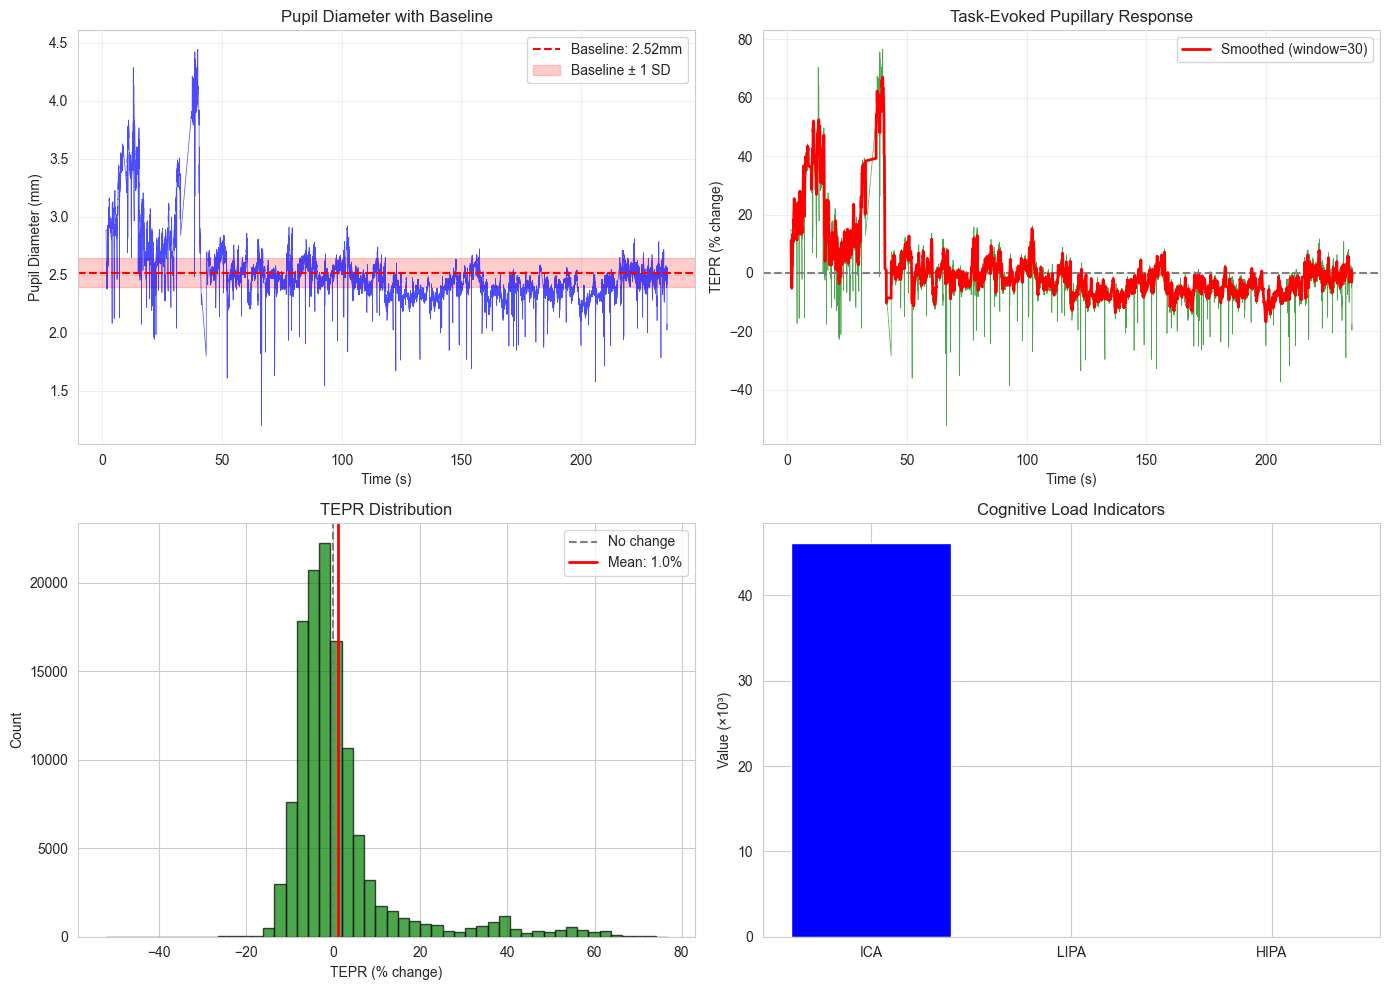

In [163]:
# Visualize pupillary response
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pupil diameter with baseline
if 'pupil_diameter' in analyzer.data.columns and 'recording_timestamp' in analyzer.data.columns:
    timestamps = analyzer.data['recording_timestamp'].values
    pupil = analyzer.data['pupil_diameter'].values
    
    # Raw pupil with baseline
    axes[0, 0].plot(timestamps, pupil, 'b-', alpha=0.7, linewidth=0.5)
    axes[0, 0].axhline(y=tepr_results['baseline_mean'], color='r', linestyle='--', 
                       label=f"Baseline: {tepr_results['baseline_mean']:.2f}mm")
    axes[0, 0].axhspan(tepr_results['baseline_mean'] - tepr_results['baseline_std'],
                       tepr_results['baseline_mean'] + tepr_results['baseline_std'],
                       alpha=0.2, color='red', label='Baseline ± 1 SD')
    axes[0, 0].set_xlabel('Time (s)')
    axes[0, 0].set_ylabel('Pupil Diameter (mm)')
    axes[0, 0].set_title('Pupil Diameter with Baseline')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # TEPR (percent change from baseline)
    baseline_mean = tepr_results['baseline_mean']
    tepr_signal = (pupil - baseline_mean) / baseline_mean * 100
    axes[0, 1].plot(timestamps, tepr_signal, 'g-', alpha=0.7, linewidth=0.5)
    axes[0, 1].axhline(y=0, color='gray', linestyle='--')
    
    # Add rolling mean
    window = 30
    tepr_smooth = pd.Series(tepr_signal).rolling(window=window, center=True).mean()
    axes[0, 1].plot(timestamps, tepr_smooth, 'r-', linewidth=2, label=f'Smoothed (window={window})')
    
    axes[0, 1].set_xlabel('Time (s)')
    axes[0, 1].set_ylabel('TEPR (% change)')
    axes[0, 1].set_title('Task-Evoked Pupillary Response')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# TEPR histogram
if 'mean_tepr' in tepr_results:
    baseline_mask = timestamps < 2.0
    tepr_values = (pupil[~baseline_mask] - baseline_mean) / baseline_mean * 100
    axes[1, 0].hist(tepr_values, bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, 0].axvline(x=0, color='gray', linestyle='--', label='No change')
    axes[1, 0].axvline(x=tepr_results['mean_tepr'], color='red', linestyle='-', 
                       linewidth=2, label=f"Mean: {tepr_results['mean_tepr']:.1f}%")
    axes[1, 0].set_xlabel('TEPR (% change)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('TEPR Distribution')
    axes[1, 0].legend()

# Cognitive load summary
metrics_labels = ['ICA', 'LIPA', 'HIPA']
metrics_values = [
    ica_results.get('ica', 0) * 1000 if not np.isnan(ica_results.get('ica', np.nan)) else 0,
    lhipa_results.get('lipa', 0) * 1000 if not np.isnan(lhipa_results.get('lipa', np.nan)) else 0,
    lhipa_results.get('hipa', 0) * 1000 if not np.isnan(lhipa_results.get('hipa', np.nan)) else 0,
]
axes[1, 1].bar(metrics_labels, metrics_values, color=['blue', 'orange', 'green'])
axes[1, 1].set_ylabel('Value (×10³)')
axes[1, 1].set_title('Cognitive Load Indicators')

plt.tight_layout()
plt.show()

In [164]:
# Detect microsaccades
microsaccades = analyzer.detect_microsaccades(
    velocity_threshold=6.0,  # Lambda parameter
    min_duration=0.006,       # 6ms minimum
    max_amplitude=0.01        # Max 1% of screen (roughly 1 degree)
)

print("MICROSACCADE ANALYSIS")
print("=" * 50)
print(f"\nDetected {len(microsaccades)} microsaccades")

if microsaccades:
    ms_stats = analyzer.get_microsaccade_stats()
    print(f"\nStatistics:")
    print(f"  Rate: {ms_stats['rate_per_second']:.2f} per second")
    print(f"  Mean amplitude: {ms_stats['mean_amplitude']*1000:.2f} (×10⁻³ normalized)")
    print(f"  Std amplitude: {ms_stats['std_amplitude']*1000:.2f} (×10⁻³ normalized)")
    print(f"  Mean duration: {ms_stats['mean_duration']*1000:.2f} ms")
    print(f"  Mean peak velocity: {ms_stats['mean_peak_velocity']:.2f} (normalized/s)")

MICROSACCADE ANALYSIS

Detected 209 microsaccades

Statistics:
  Rate: 0.89 per second
  Mean amplitude: 4.19 (×10⁻³ normalized)
  Std amplitude: 3.08 (×10⁻³ normalized)
  Mean duration: 10.25 ms
  Mean peak velocity: 27.66 (normalized/s)


## 18. Reading Behavior Analysis

Specialized metrics for reading tasks:
- **Forward saccades**: Progressive reading movements
- **Regressions**: Backward saccades (re-reading)
- **Line returns**: Large movements to start of next line
- **Refixations**: Multiple fixations on same word/location

The **regression rate** is particularly important as it increases with text difficulty and comprehension problems.

/var/folders/4r/6fydpnls2mg8q1p98g9zqmy00000gn/T/ipykernel_99871/245952961.py:33: UserWarning:

Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.

/Users/yenokhakobyan/HCI Lab ToolKit/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.



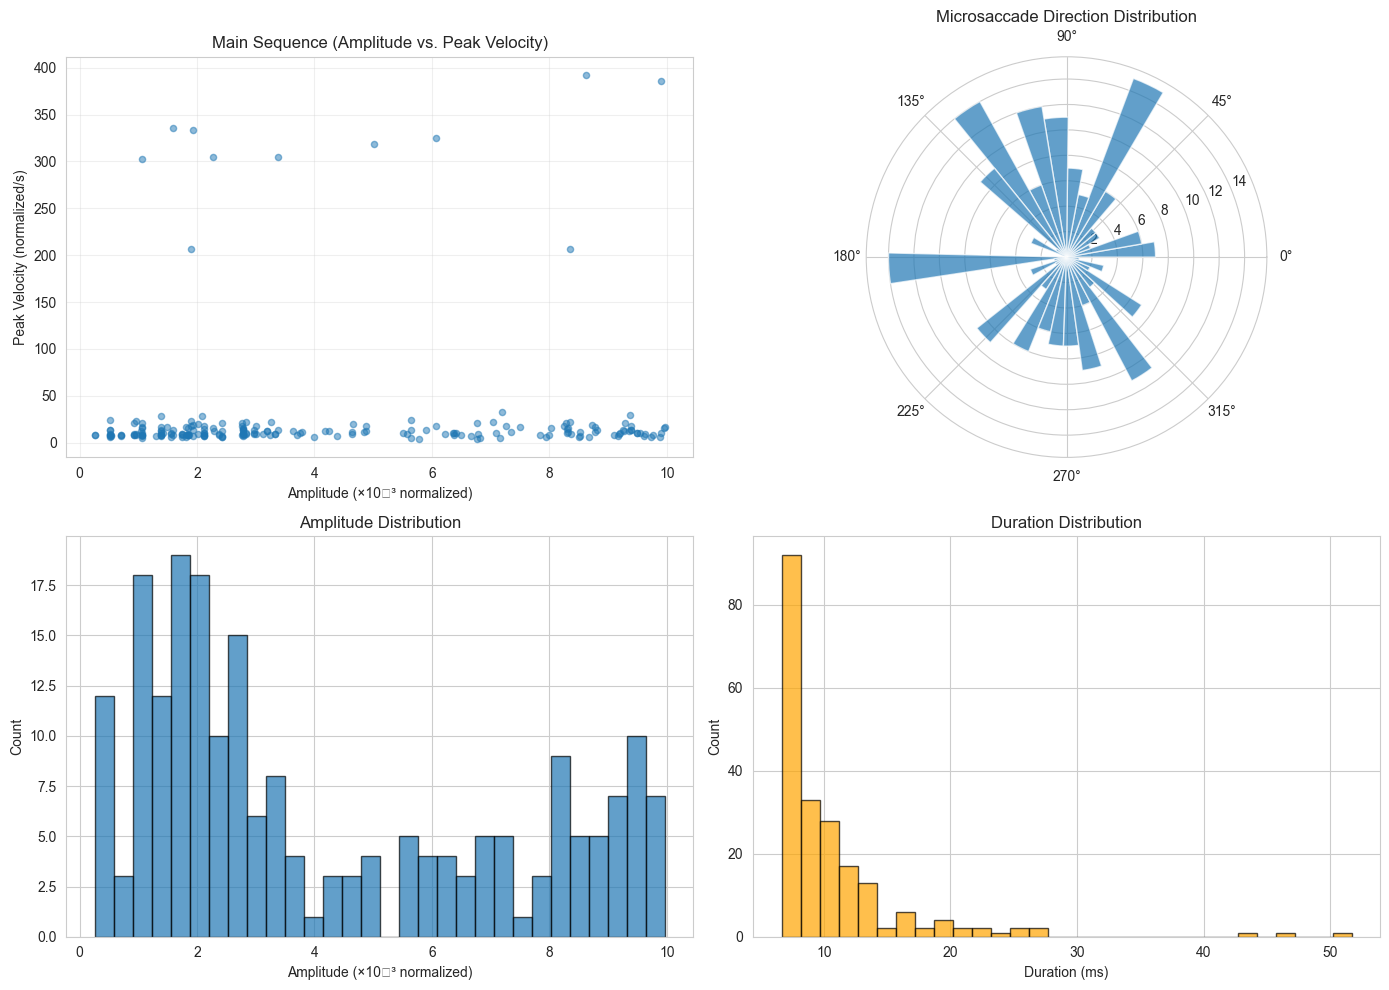

In [165]:
# Visualize microsaccades
if microsaccades:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    ms_df = analyzer.get_microsaccades_dataframe()
    
    # Main sequence plot (amplitude vs peak velocity)
    axes[0, 0].scatter(ms_df['amplitude']*1000, ms_df['peak_velocity'], alpha=0.5, s=20)
    axes[0, 0].set_xlabel('Amplitude (×10⁻³ normalized)')
    axes[0, 0].set_ylabel('Peak Velocity (normalized/s)')
    axes[0, 0].set_title('Main Sequence (Amplitude vs. Peak Velocity)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Direction distribution (polar plot)
    ax_polar = fig.add_subplot(2, 2, 2, projection='polar')
    directions_rad = np.radians(ms_df['direction'])
    ax_polar.hist(directions_rad, bins=36, alpha=0.7)
    ax_polar.set_title('Microsaccade Direction Distribution')
    axes[0, 1].axis('off')  # Hide the original axes
    
    # Amplitude histogram
    axes[1, 0].hist(ms_df['amplitude']*1000, bins=30, edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Amplitude (×10⁻³ normalized)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Amplitude Distribution')
    
    # Duration histogram
    axes[1, 1].hist(ms_df['duration']*1000, bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 1].set_xlabel('Duration (ms)')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Duration Distribution')
    
    plt.tight_layout()
    plt.show()
else:
    print("No microsaccades detected - try adjusting detection parameters")

In [166]:
# Analyze reading behavior
reading_results = analyzer.analyze_reading_behavior(
    reading_direction="ltr",  # Left-to-right
    line_height=0.05          # Approximate line height
)

print("READING BEHAVIOR ANALYSIS")
print("=" * 50)
print(f"\nSaccade Classification:")
print(f"  Forward saccades: {reading_results['forward_saccade_count']}")
print(f"  Regressions: {reading_results['regression_count']}")
print(f"  Line returns: {reading_results['line_return_count']}")

print(f"\nReading Metrics:")
print(f"  Regression rate: {reading_results['regression_rate']*100:.1f}%")
print(f"  Reading efficiency: {reading_results['reading_efficiency']*100:.1f}%")

print(f"\nFixation Behavior:")
print(f"  Refixations: {reading_results['refixation_count']}")
print(f"  Refixation rate: {reading_results['refixation_rate']*100:.1f}%")

# Interpretation
if reading_results['regression_rate'] > 0.2:
    print("\nInterpretation: High regression rate may indicate:")
    print("  - Difficult text content")
    print("  - Comprehension issues")
    print("  - Complex information processing")
elif reading_results['regression_rate'] < 0.1:
    print("\nInterpretation: Low regression rate suggests:")
    print("  - Fluent reading")
    print("  - Good comprehension")
    print("  - Familiar content")

READING BEHAVIOR ANALYSIS

Saccade Classification:
  Forward saccades: 379
  Regressions: 176
  Line returns: 58

Reading Metrics:
  Regression rate: 24.8%
  Reading efficiency: 53.5%

Fixation Behavior:
  Refixations: 167
  Refixation rate: 23.5%

Interpretation: High regression rate may indicate:
  - Difficult text content
  - Comprehension issues
  - Complex information processing


## 19. Smooth Pursuit Detection

Smooth pursuit eye movements occur when tracking moving objects. They have:
- Intermediate velocity (between fixations and saccades)
- Relatively constant velocity
- Duration typically > 100ms

This analysis identifies potential smooth pursuit segments in the data.

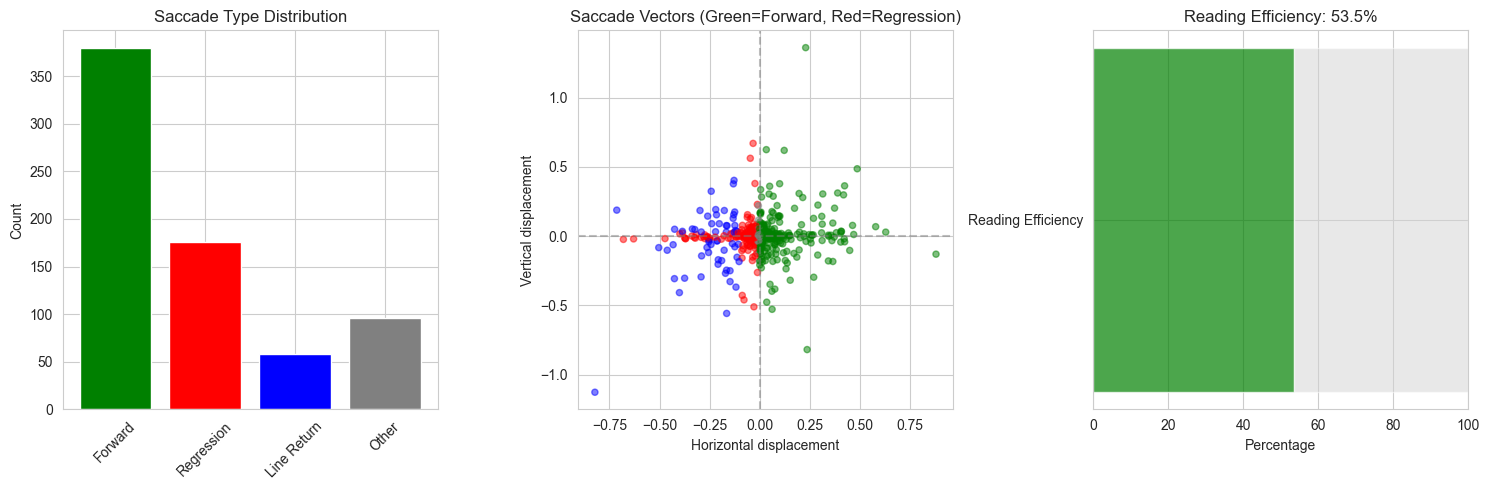

In [167]:
# Visualize reading patterns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Saccade type distribution
types = ['Forward', 'Regression', 'Line Return', 'Other']
counts = [
    reading_results['forward_saccade_count'],
    reading_results['regression_count'],
    reading_results['line_return_count'],
    len(saccades) - reading_results['forward_saccade_count'] - 
    reading_results['regression_count'] - reading_results['line_return_count']
]
colors = ['green', 'red', 'blue', 'gray']
axes[0].bar(types, counts, color=colors)
axes[0].set_ylabel('Count')
axes[0].set_title('Saccade Type Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Saccade direction visualization
sacc_df = analyzer.get_saccades_dataframe()
if not sacc_df.empty:
    # Color-code by type
    sacc_colors = []
    for i in range(len(sacc_df)):
        if i in reading_results['forward_saccade_indices']:
            sacc_colors.append('green')
        elif i in reading_results['regression_indices']:
            sacc_colors.append('red')
        elif i in reading_results['line_return_indices']:
            sacc_colors.append('blue')
        else:
            sacc_colors.append('gray')
    
    dx = sacc_df['end_x'] - sacc_df['start_x']
    dy = sacc_df['end_y'] - sacc_df['start_y']
    axes[1].scatter(dx, dy, c=sacc_colors, alpha=0.5, s=20)
    axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Horizontal displacement')
    axes[1].set_ylabel('Vertical displacement')
    axes[1].set_title('Saccade Vectors (Green=Forward, Red=Regression)')

# Reading efficiency gauge
efficiency = reading_results['reading_efficiency'] * 100
axes[2].barh(['Reading Efficiency'], [efficiency], color='green', alpha=0.7)
axes[2].barh(['Reading Efficiency'], [100-efficiency], left=[efficiency], color='lightgray', alpha=0.5)
axes[2].set_xlim(0, 100)
axes[2].set_xlabel('Percentage')
axes[2].set_title(f'Reading Efficiency: {efficiency:.1f}%')

plt.tight_layout()
plt.show()

## 20. Comprehensive Summary Report

Generate a full analysis report with all computed metrics.

In [168]:
# Detect smooth pursuits
pursuits = analyzer.detect_smooth_pursuit(
    velocity_range=(0.02, 0.3),  # Velocity between fixation and saccade
    min_duration=0.1             # At least 100ms
)

print("SMOOTH PURSUIT ANALYSIS")
print("=" * 50)
print(f"\nDetected {len(pursuits)} potential smooth pursuit segments")

if pursuits:
    durations = [p.duration for p in pursuits]
    velocities = [p.mean_velocity for p in pursuits]
    
    print(f"\nStatistics:")
    print(f"  Mean duration: {np.mean(durations)*1000:.1f} ms")
    print(f"  Max duration: {np.max(durations)*1000:.1f} ms")
    print(f"  Mean velocity: {np.mean(velocities):.4f} (normalized/s)")
    print(f"  Total pursuit time: {sum(durations):.2f} s")

SMOOTH PURSUIT ANALYSIS

Detected 0 potential smooth pursuit segments


In [169]:
# Generate comprehensive summary
summary = analyzer.generate_summary_report()

print("=" * 70)
print("COMPREHENSIVE EYE TRACKING ANALYSIS REPORT")
print("=" * 70)

print("\n" + "-" * 50)
print("DATA QUALITY")
print("-" * 50)
for key, value in summary.get('data_quality', {}).items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

print("\n" + "-" * 50)
print("FIXATION ANALYSIS")
print("-" * 50)
for key, value in summary.get('fixation_stats', {}).items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

print("\n" + "-" * 50)
print("SACCADE ANALYSIS")
print("-" * 50)
for key, value in summary.get('saccade_stats', {}).items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

print("\n" + "-" * 50)
print("PUPIL ANALYSIS")
print("-" * 50)
for key, value in summary.get('pupil_stats', {}).items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f} mm")
    else:
        print(f"  {key}: {value}")

if 'k_coefficient' in summary:
    print("\n" + "-" * 50)
    print("ATTENTION MODE (K COEFFICIENT)")
    print("-" * 50)
    k_data = summary['k_coefficient']
    print(f"  K coefficient: {k_data.get('k_coefficient', 'N/A'):.4f}" if not isinstance(k_data.get('k_coefficient'), str) else f"  K coefficient: {k_data.get('k_coefficient')}")
    print(f"  Attention mode: {k_data.get('attention_mode', 'N/A')}")

if 'microsaccade_stats' in summary:
    print("\n" + "-" * 50)
    print("MICROSACCADE ANALYSIS")
    print("-" * 50)
    for key, value in summary['microsaccade_stats'].items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")

print("\n" + "=" * 70)

COMPREHENSIVE EYE TRACKING ANALYSIS REPORT

--------------------------------------------------
DATA QUALITY
--------------------------------------------------
  total_samples: 122282
  left_eye_validity: 0.9565
  right_eye_validity: 0.8012
  binocular_validity: 0.7578
  overall_validity: 0.9565
  gap_count: 0
  mean_gap_length: 0
  max_gap_length: 0
  sampling_rate: 599.8800
  sampling_jitter: 9.3297
  precision_rms: 0.0048

--------------------------------------------------
FIXATION ANALYSIS
--------------------------------------------------
  fixation_count: 710
  mean_duration: 0.2147
  std_duration: 0.1425
  min_duration: 0.1000
  max_duration: 1.5716
  total_fixation_time: 152.4699

--------------------------------------------------
SACCADE ANALYSIS
--------------------------------------------------
  saccade_count: 709
  mean_amplitude: 0.1226
  std_amplitude: 0.1612
  mean_velocity: 5.3261
  mean_duration: 0.1155

--------------------------------------------------
PUPIL ANALYSIS

In [170]:
# # Export all events and advanced metrics
# export_dir = project_root / "data" / "processed" / "tobii" / "advanced"
# exported_files = analyzer.export_all_events(str(export_dir))

# print("EXPORTED FILES")
# print("=" * 50)
# for event_type, path in exported_files.items():
#     print(f"  {event_type}: {path}")

# # Also export advanced metrics as JSON
# import json

# advanced_metrics = {
#     "k_coefficient": k_results,
#     "entropy": {k: v for k, v in entropy_results.items() if k != 'aoi_sequence'},
#     "cognitive_load": {
#         "ica": ica_results,
#         "lhipa": lhipa_results,
#         "tepr": {k: v for k, v in tepr_results.items() if k != 'event_responses'},
#     },
#     "reading": {k: v for k, v in reading_results.items() if not k.endswith('_indices')},
#     "data_quality": quality_metrics,
# }

# # Convert numpy types to Python types for JSON serialization
# def convert_to_serializable(obj):
#     if isinstance(obj, np.ndarray):
#         return obj.tolist()
#     elif isinstance(obj, (np.float32, np.float64)):
#         return float(obj)
#     elif isinstance(obj, (np.int32, np.int64)):
#         return int(obj)
#     elif isinstance(obj, dict):
#         return {k: convert_to_serializable(v) for k, v in obj.items()}
#     elif isinstance(obj, list):
#         return [convert_to_serializable(i) for i in obj]
#     return obj

# advanced_metrics_serializable = convert_to_serializable(advanced_metrics)

# metrics_path = export_dir / "advanced_metrics.json"
# with open(metrics_path, 'w') as f:
#     json.dump(advanced_metrics_serializable, f, indent=2)
# print(f"  advanced_metrics: {metrics_path}")

# print(f"\nAll advanced analysis results saved to: {export_dir}")

---

# State-of-the-Art Eye Tracking Analysis

The following sections implement cutting-edge eye tracking analysis methods from recent research literature.

## 21. Blink Detection and Analysis

Detect blinks from pupil data loss patterns and analyze blink metrics.

BLINK ANALYSIS
Total blinks detected: 112
Blink rate: 28.67 blinks/min
Mean blink duration: 169.5 ms
Std blink duration: 72.0 ms


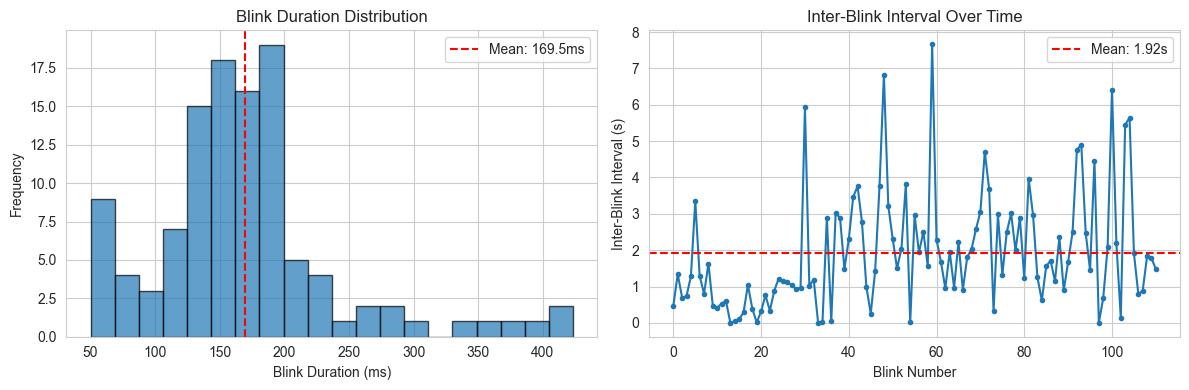

In [171]:
# Detect blinks from pupil data
blinks = analyzer.detect_blinks(min_duration=0.05, max_duration=0.5)
blink_stats = analyzer.get_blink_stats(blinks)

print("BLINK ANALYSIS")
print("=" * 50)
print(f"Total blinks detected: {blink_stats['blink_count']}")
print(f"Blink rate: {blink_stats['blink_rate_per_minute']:.2f} blinks/min")
print(f"Mean blink duration: {blink_stats['mean_duration']*1000:.1f} ms")
print(f"Std blink duration: {blink_stats['std_duration']*1000:.1f} ms")

# Visualize blink distribution
if len(blinks) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Blink duration histogram
    durations = [b['duration'] * 1000 for b in blinks]
    axes[0].hist(durations, bins=20, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Blink Duration (ms)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Blink Duration Distribution')
    axes[0].axvline(blink_stats['mean_duration']*1000, color='red', 
                    linestyle='--', label=f"Mean: {blink_stats['mean_duration']*1000:.1f}ms")
    axes[0].legend()
    
    # Inter-blink interval over time
    if len(blinks) > 1:
        ibis = [blinks[i+1]['start_time'] - blinks[i]['end_time'] 
                for i in range(len(blinks)-1)]
        mean_ibi = np.mean(ibis) if ibis else 0
        axes[1].plot(ibis, marker='o', markersize=3)
        axes[1].set_xlabel('Blink Number')
        axes[1].set_ylabel('Inter-Blink Interval (s)')
        axes[1].set_title('Inter-Blink Interval Over Time')
        axes[1].axhline(mean_ibi, color='red', 
                        linestyle='--', label=f"Mean: {mean_ibi:.2f}s")
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

## 22. Fixation Stability Analysis (BCEA)

Analyze fixation stability using Bivariate Contour Ellipse Area (BCEA) and dispersion metrics.

In [172]:
# Compute fixation stability metrics
stability = analyzer.compute_fixation_stability()

print("FIXATION STABILITY ANALYSIS")
print("=" * 50)
if stability:
    print(f"Mean BCEA: {stability['mean_bcea']:.4f} deg²")
    print(f"Std BCEA: {stability['std_bcea']:.4f} deg²")
    print(f"Mean RMS: {stability['mean_rms']:.4f} deg")
    print(f"Mean STD: {stability['mean_std']:.4f} deg")
    print(f"Stability index: {stability['stability_index']:.4f}")
    print(f"Fixations analyzed: {stability['n_analyzed_fixations']}")
else:
    print("No fixation stability data available")

FIXATION STABILITY ANALYSIS
Mean BCEA: 0.0001 deg²
Std BCEA: 0.0000 deg²
Mean RMS: 0.0051 deg
Mean STD: 0.0048 deg
Stability index: 944.0464
Fixations analyzed: 709


## 23. Gaze Dispersion Entropy

Compute spatial entropy of gaze distribution to quantify exploration patterns.

In [173]:
# Compute gaze dispersion entropy
entropy_results = analyzer.compute_gaze_dispersion_entropy(grid_size=(10, 10))

print("GAZE DISPERSION ENTROPY")
print("=" * 50)
print(f"Spatial entropy: {entropy_results['spatial_entropy']:.4f} bits")
print(f"Normalized entropy: {entropy_results['normalized_entropy']:.4f}")
print(f"Max possible entropy: {entropy_results['max_entropy']:.4f} bits")
print(f"Grid coverage: {entropy_results['coverage_ratio']:.1%}")
print(f"Occupied cells: {entropy_results['n_occupied_cells']}/{entropy_results['total_cells']}")

# Interpret the entropy
if entropy_results['normalized_entropy'] > 0.7:
    interpretation = "High exploration (distributed gaze)"
elif entropy_results['normalized_entropy'] > 0.4:
    interpretation = "Moderate exploration"
else:
    interpretation = "Focused viewing (concentrated gaze)"
print(f"\nInterpretation: {interpretation}")

GAZE DISPERSION ENTROPY
Spatial entropy: 5.4107 bits
Normalized entropy: 0.8144
Max possible entropy: 6.6439 bits
Grid coverage: 89.0%
Occupied cells: 89/100

Interpretation: High exploration (distributed gaze)


## 24. Main Sequence Analysis

Analyze the relationship between saccade amplitude and peak velocity (main sequence). Deviations from the expected power-law relationship can indicate neurological or cognitive factors.

In [174]:
# Compute main sequence analysis
main_seq = analyzer.compute_main_sequence(fit_model=True)

print("MAIN SEQUENCE ANALYSIS")
print("=" * 50)
if 'error' not in main_seq:
    print(f"Number of saccades: {main_seq['n_saccades']}")
    print(f"Amplitude range: {main_seq['amplitude_range'][0]:.2f}° - {main_seq['amplitude_range'][1]:.2f}°")
    print(f"Velocity range: {main_seq['velocity_range'][0]:.1f}°/s - {main_seq['velocity_range'][1]:.1f}°/s")
    print(f"Correlation: {main_seq['correlation']:.4f}")
    
    if 'power_law' in main_seq:
        pl = main_seq['power_law']
        print(f"\nPower law fit: V = {pl['coefficient_A']:.2f} × A^{pl['exponent_B']:.3f}")
        print(f"R² score: {pl['r_squared']:.4f}")
        print(f"P-value: {pl['p_value']:.4e}")
    
    if 'outlier_count' in main_seq:
        print(f"\nOutlier saccades: {main_seq['outlier_count']} ({main_seq['outlier_percentage']:.1f}%)")
else:
    print(f"Error: {main_seq['error']}")

MAIN SEQUENCE ANALYSIS
Number of saccades: 709
Amplitude range: 0.00° - 1.40°
Velocity range: 0.0°/s - 27.4°/s
Correlation: -0.0622

Power law fit: V = 5.22 × A^0.282
R² score: 0.0701
P-value: 7.8246e-13

Outlier saccades: 66 (9.3%)


## 25. Wavelet-Based Pupil Analysis

Apply continuous wavelet transform to pupil diameter signal to identify time-frequency patterns related to cognitive processing.

In [175]:
# Perform wavelet analysis on pupil data
wavelet_results = analyzer.compute_pupil_wavelet_analysis(wavelet='morl')

print("WAVELET PUPIL ANALYSIS")
print("=" * 50)
if 'error' not in wavelet_results:
    print(f"Frequency range: {wavelet_results['frequencies'][0]:.3f} - {wavelet_results['frequencies'][-1]:.3f} Hz")
    print(f"Dominant frequency: {wavelet_results['dominant_frequency']:.4f} Hz")
    print(f"Total power: {wavelet_results['total_power']:.4f}")
    
    # Power in different frequency bands
    print("\nPower by frequency band:")
    for key in ['very_low_power', 'low_power', 'high_power', 'very_high_power']:
        if key in wavelet_results:
            band_name = key.replace('_power', '').replace('_', ' ').title()
            print(f"  {band_name}: {wavelet_results[key]:.4f}")
else:
    print(f"Error: {wavelet_results['error']}")

WAVELET PUPIL ANALYSIS
Frequency range: 0.050 - 20.000 Hz
Dominant frequency: 0.0500 Hz
Total power: 808.7734

Power by frequency band:
  Very Low: nan
  Low: 79.8933
  High: 7.4814
  Very High: 1.2051


## 26. MultiMatch Scanpath Comparison

Compare scanpaths using the MultiMatch algorithm (Dewhurst et al., 2012), which evaluates similarity across 5 dimensions: shape, direction, length, position, and duration.

Comparing scanpaths: 355 fixations vs 355 fixations

MULTIMATCH SCANPATH COMPARISON
Vector similarity: 0.5049
Direction similarity: 0.5052
Length similarity: 0.2950
Position similarity: 0.7699
Duration similarity: 0.6425

Overall similarity: 0.5435


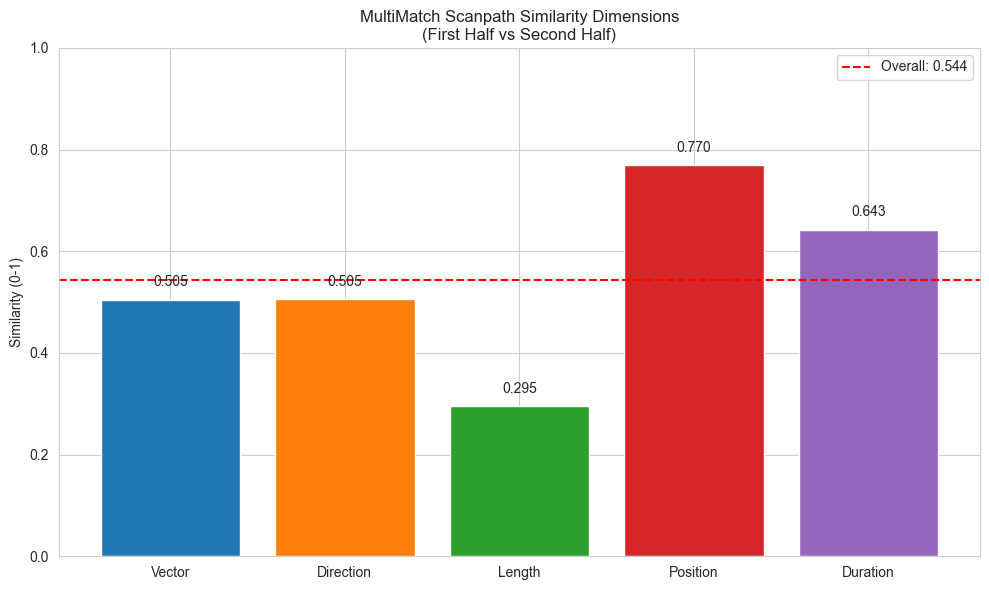

In [176]:
# For demonstration, compare first half vs second half of recording
all_fixations = analyzer.fixations
mid_point = len(all_fixations) // 2

first_half = all_fixations[:mid_point]
second_half = all_fixations[mid_point:]

print(f"Comparing scanpaths: {len(first_half)} fixations vs {len(second_half)} fixations")

# Compute MultiMatch similarity
multimatch = analyzer.compute_multimatch(
    other_fixations=second_half,
    screen_size=(SCREEN_WIDTH, SCREEN_HEIGHT)
)

print("\nMULTIMATCH SCANPATH COMPARISON")
print("=" * 50)
print(f"Vector similarity: {multimatch['vector_similarity']:.4f}")
print(f"Direction similarity: {multimatch['direction_similarity']:.4f}")
print(f"Length similarity: {multimatch['length_similarity']:.4f}")
print(f"Position similarity: {multimatch['position_similarity']:.4f}")
print(f"Duration similarity: {multimatch['duration_similarity']:.4f}")
print(f"\nOverall similarity: {multimatch['overall_similarity']:.4f}")

# Visualize MultiMatch dimensions
dimensions = ['Vector', 'Direction', 'Length', 'Position', 'Duration']
values = [
    multimatch['vector_similarity'],
    multimatch['direction_similarity'],
    multimatch['length_similarity'],
    multimatch['position_similarity'],
    multimatch['duration_similarity']
]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(dimensions, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_ylim(0, 1)
ax.set_ylabel('Similarity (0-1)')
ax.set_title('MultiMatch Scanpath Similarity Dimensions\n(First Half vs Second Half)')
ax.axhline(multimatch['overall_similarity'], color='red', linestyle='--', 
           label=f"Overall: {multimatch['overall_similarity']:.3f}")

# Add value labels on bars
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{val:.3f}', ha='center', va='bottom')

ax.legend()
plt.tight_layout()
plt.show()

## 27. Dynamic Time Warping (DTW) Scanpath Similarity

Use DTW to compute optimal alignment between scanpaths, allowing for temporal warping. This is useful for comparing viewing patterns with different numbers of fixations.

DYNAMIC TIME WARPING ANALYSIS
DTW distance (spatial): 96.3274
Normalized DTW distance: 0.0904
DTW similarity: 0.9360
Path length: 1065
Warping ratio: 1.500


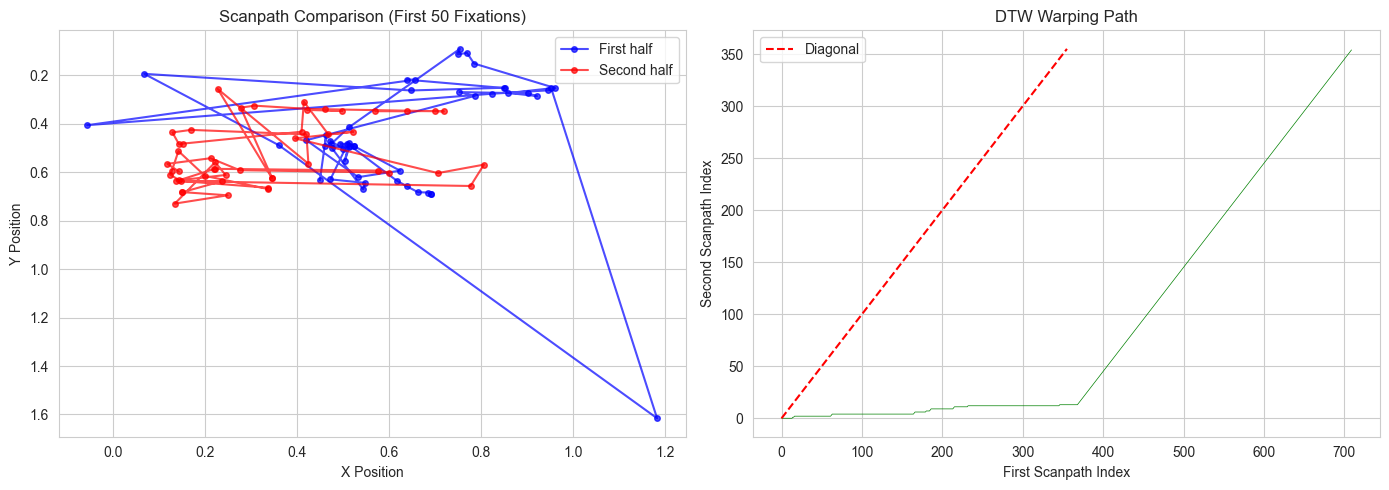

In [177]:
# Compute DTW similarity between first and second half
# Note: first_half and second_half are defined in the previous cell
try:
    dtw_results = analyzer.compute_dtw_similarity(
        other_fixations=second_half,
        use_duration=True
    )

    print("DYNAMIC TIME WARPING ANALYSIS")
    print("=" * 50)
    print(f"DTW distance (spatial): {dtw_results['dtw_distance']:.4f}")
    print(f"Normalized DTW distance: {dtw_results['normalized_distance']:.4f}")
    print(f"DTW similarity: {dtw_results['dtw_similarity']:.4f}")
    print(f"Path length: {dtw_results['path_length']}")
    print(f"Warping ratio: {dtw_results['warping_ratio']:.3f}")

    # Visualize alignment
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scanpath comparison
    first_x = [f.x for f in first_half[:50]]  # Limit for visibility
    first_y = [f.y for f in first_half[:50]]
    second_x = [f.x for f in second_half[:50]]
    second_y = [f.y for f in second_half[:50]]

    axes[0].plot(first_x, first_y, 'b-o', markersize=4, alpha=0.7, label='First half')
    axes[0].plot(second_x, second_y, 'r-o', markersize=4, alpha=0.7, label='Second half')
    axes[0].set_xlabel('X Position')
    axes[0].set_ylabel('Y Position')
    axes[0].set_title('Scanpath Comparison (First 50 Fixations)')
    axes[0].legend()
    axes[0].invert_yaxis()

    # DTW warping path visualization
    if 'warping_path' in dtw_results:
        path = dtw_results['warping_path']
        axes[1].plot([p[0] for p in path], [p[1] for p in path], 'g-', linewidth=0.5)
        axes[1].plot([0, min(len(first_half), len(second_half))], 
                     [0, min(len(first_half), len(second_half))], 'r--', label='Diagonal')
        axes[1].set_xlabel('First Scanpath Index')
        axes[1].set_ylabel('Second Scanpath Index')
        axes[1].set_title('DTW Warping Path')
        axes[1].legend()

    plt.tight_layout()
    plt.show()
except NameError:
    print("Please run the MultiMatch cell (previous cell) first to define first_half and second_half")

## 28. Saliency Map Comparison

Compare gaze patterns to computational saliency maps using standard metrics: NSS (Normalized Scanpath Saliency), AUC-Judd, KL divergence, Correlation Coefficient, and Similarity (SIM).

SALIENCY MAP COMPARISON
NSS (Normalized Scanpath Saliency): 0.4447
AUC-Judd: 0.5926
KL Divergence: 11.0075
Correlation Coefficient (CC): 0.0067
Similarity (SIM): 0.0008

Interpretation:
  NSS > 0 indicates gaze falls on higher-than-average saliency
  AUC-Judd = 0.5 is chance, 1.0 is perfect prediction
  Lower KL divergence = better match between distributions


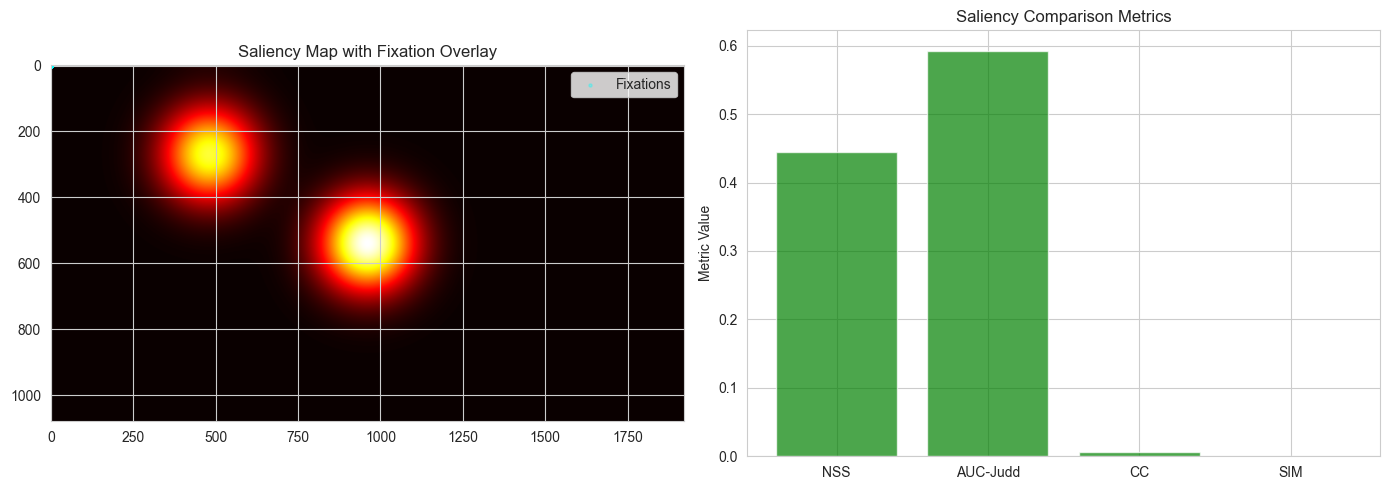

In [178]:
# Create a synthetic saliency map for demonstration
# In practice, you would load a saliency map from a model like SALICON, DeepGaze, etc.
from scipy.ndimage import gaussian_filter

# Generate saliency map with hotspots at common fixation locations
saliency_map = np.zeros((SCREEN_HEIGHT, SCREEN_WIDTH))

# Center hotspot
saliency_map[SCREEN_HEIGHT//2, SCREEN_WIDTH//2] = 1.0
# Top-left hotspot  
saliency_map[SCREEN_HEIGHT//4, SCREEN_WIDTH//4] = 0.8
# Apply Gaussian blur
saliency_map = gaussian_filter(saliency_map, sigma=100)
saliency_map = saliency_map / saliency_map.max()  # Normalize

# Compare gaze to saliency map
saliency_metrics = analyzer.compare_to_saliency_map(saliency_map, use_fixations=True)

print("SALIENCY MAP COMPARISON")
print("=" * 50)
print(f"NSS (Normalized Scanpath Saliency): {saliency_metrics['nss']:.4f}")
print(f"AUC-Judd: {saliency_metrics['auc_judd']:.4f}")
print(f"KL Divergence: {saliency_metrics['kl_divergence']:.4f}")
print(f"Correlation Coefficient (CC): {saliency_metrics['correlation']:.4f}")
print(f"Similarity (SIM): {saliency_metrics['similarity']:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"  NSS > 0 indicates gaze falls on higher-than-average saliency")
print(f"  AUC-Judd = 0.5 is chance, 1.0 is perfect prediction")
print(f"  Lower KL divergence = better match between distributions")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Saliency map with fixations overlay
axes[0].imshow(saliency_map, cmap='hot', origin='upper')
fix_x = [f.x for f in analyzer.fixations if 0 <= f.x < SCREEN_WIDTH and 0 <= f.y < SCREEN_HEIGHT]
fix_y = [f.y for f in analyzer.fixations if 0 <= f.x < SCREEN_WIDTH and 0 <= f.y < SCREEN_HEIGHT]
axes[0].scatter(fix_x, fix_y, c='cyan', s=5, alpha=0.3, label='Fixations')
axes[0].set_title('Saliency Map with Fixation Overlay')
axes[0].legend()

# Metrics bar chart
metrics_names = ['NSS', 'AUC-Judd', 'CC', 'SIM']
metrics_values = [
    saliency_metrics['nss'],
    saliency_metrics['auc_judd'],
    saliency_metrics['correlation'],
    saliency_metrics['similarity']
]
colors = ['green' if v > 0 else 'red' for v in metrics_values]
axes[1].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_ylabel('Metric Value')
axes[1].set_title('Saliency Comparison Metrics')

plt.tight_layout()
plt.show()

## 29. Complete State-of-the-Art Analysis Summary

Comprehensive summary of all advanced metrics computed.

In [179]:
print("=" * 70)
print("STATE-OF-THE-ART EYE TRACKING ANALYSIS SUMMARY")
print("=" * 70)

print("\n" + "-" * 50)
print("BLINK METRICS")
print("-" * 50)
if blink_stats.get('blink_count', 0) > 0:
    print(f"  Blink rate: {blink_stats['blink_rate_per_minute']:.2f} blinks/min")
    print(f"  Mean blink duration: {blink_stats['mean_duration']*1000:.1f} ms")
else:
    print("  No blinks detected")

print("\n" + "-" * 50)
print("FIXATION STABILITY")
print("-" * 50)
if stability:
    print(f"  Mean BCEA: {stability['mean_bcea']:.4f} deg²")
    print(f"  Stability index: {stability['stability_index']:.4f}")
else:
    print("  No stability data available")

print("\n" + "-" * 50)
print("GAZE DISPERSION")
print("-" * 50)
print(f"  Normalized entropy: {entropy_results['normalized_entropy']:.4f}")
print(f"  Grid coverage: {entropy_results['coverage_ratio']:.1%}")

print("\n" + "-" * 50)
print("MAIN SEQUENCE")
print("-" * 50)
if 'power_law' in main_seq:
    pl = main_seq['power_law']
    print(f"  Power law: V = {pl['coefficient_A']:.1f} × A^{pl['exponent_B']:.2f}")
    print(f"  R² score: {pl['r_squared']:.4f}")
else:
    print("  No power law fit available")

print("\n" + "-" * 50)
print("PUPIL WAVELET ANALYSIS")
print("-" * 50)
if 'error' not in wavelet_results:
    print(f"  Dominant frequency: {wavelet_results['dominant_frequency']:.4f} Hz")
    print(f"  Total power: {wavelet_results['total_power']:.4f}")
else:
    print(f"  Error: {wavelet_results['error']}")

print("\n" + "-" * 50)
print("SCANPATH COMPARISON (First vs Second Half)")
print("-" * 50)
print(f"  MultiMatch overall: {multimatch['overall_similarity']:.4f}")
try:
    print(f"  DTW similarity: {dtw_results['dtw_similarity']:.4f}")
except NameError:
    print("  DTW similarity: Not computed")

print("\n" + "-" * 50)
print("SALIENCY METRICS")
print("-" * 50)
print(f"  NSS: {saliency_metrics['nss']:.4f}")
print(f"  AUC-Judd: {saliency_metrics['auc_judd']:.4f}")
print(f"  Similarity: {saliency_metrics['similarity']:.4f}")

print("\n" + "=" * 70)
print("Analysis complete!")
print("=" * 70)

STATE-OF-THE-ART EYE TRACKING ANALYSIS SUMMARY

--------------------------------------------------
BLINK METRICS
--------------------------------------------------
  Blink rate: 28.67 blinks/min
  Mean blink duration: 169.5 ms

--------------------------------------------------
FIXATION STABILITY
--------------------------------------------------
  Mean BCEA: 0.0001 deg²
  Stability index: 944.0464

--------------------------------------------------
GAZE DISPERSION
--------------------------------------------------
  Normalized entropy: 0.8144
  Grid coverage: 89.0%

--------------------------------------------------
MAIN SEQUENCE
--------------------------------------------------
  Power law: V = 5.2 × A^0.28
  R² score: 0.0701

--------------------------------------------------
PUPIL WAVELET ANALYSIS
--------------------------------------------------
  Dominant frequency: 0.0500 Hz
  Total power: 808.7734

--------------------------------------------------
SCANPATH COMPARISON (First 

---

# Advanced Visualizations

The following sections demonstrate the new enhanced visualization capabilities added to the toolkit.

These visualizations provide deeper insights into:
- Cognitive load indicators
- Attention patterns (ambient vs focal)
- Reading behavior analysis
- AOI transitions
- Saccade characteristics
- Data quality assessment
- Scanpath comparison

## 30. Cognitive Load Dashboard

Visualize multiple cognitive load indicators including ICA, LHIPA, and TEPR metrics.

/Users/yenokhakobyan/HCI Lab ToolKit/src/analyzers/tobii_analyzer.py:1154: RuntimeWarning:

Mean of empty slice

/Users/yenokhakobyan/HCI Lab ToolKit/venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning:

Degrees of freedom <= 0 for slice.



ValueError: Unknown format code 'f' for object of type 'str'

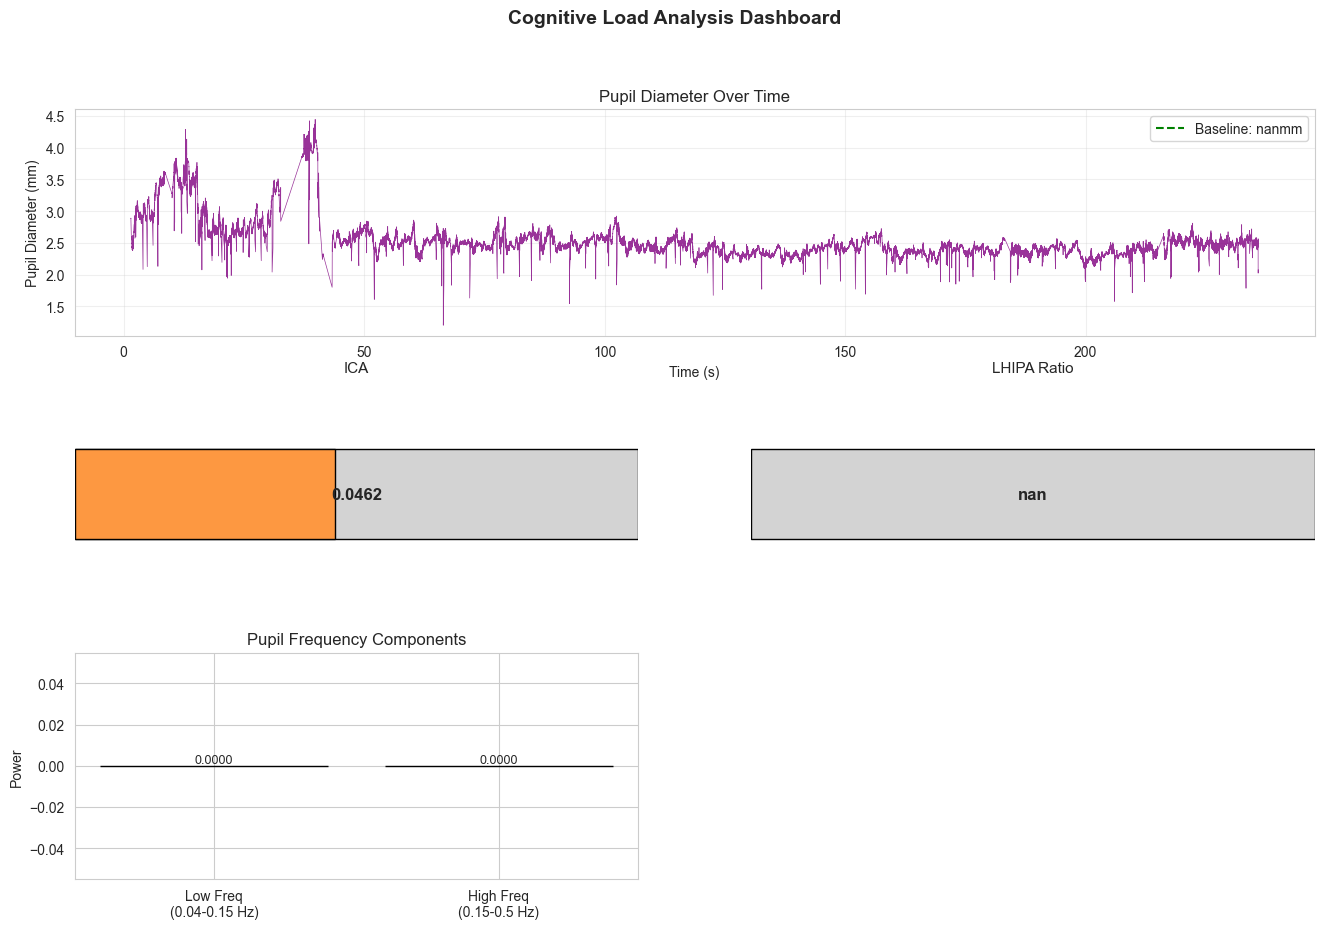

In [180]:



# Compute cognitive load metrics
ica_result = analyzer.compute_index_of_cognitive_activity()
lhipa_result = analyzer.compute_lhipa()
tepr_result = analyzer.compute_pupillary_response()

# Create cognitive load dashboard
viz = TobiiVisualizer(screen_size=analyzer.screen_size)
fig = viz.plot_cognitive_load_dashboard(
    analyzer.data,
    ica_result,
    lhipa_result,
    tepr_result,
    title="Cognitive Load Analysis Dashboard"
)
plt.show()

print("\nCognitive Load Metrics:")
print(f"  ICA: {ica_result.get('ica', 'N/A'):.4f}")
print(f"  LHIPA ratio: {lhipa_result.get('lhipa', 'N/A'):.4f}")
print(f"  Mean TEPR: {tepr_result.get('mean_tepr', 'N/A'):.2f}%")

## 31. K Coefficient Timeline (Ambient/Focal Attention)

Track how attention mode shifts between ambient (exploratory) and focal (detailed) processing over time.

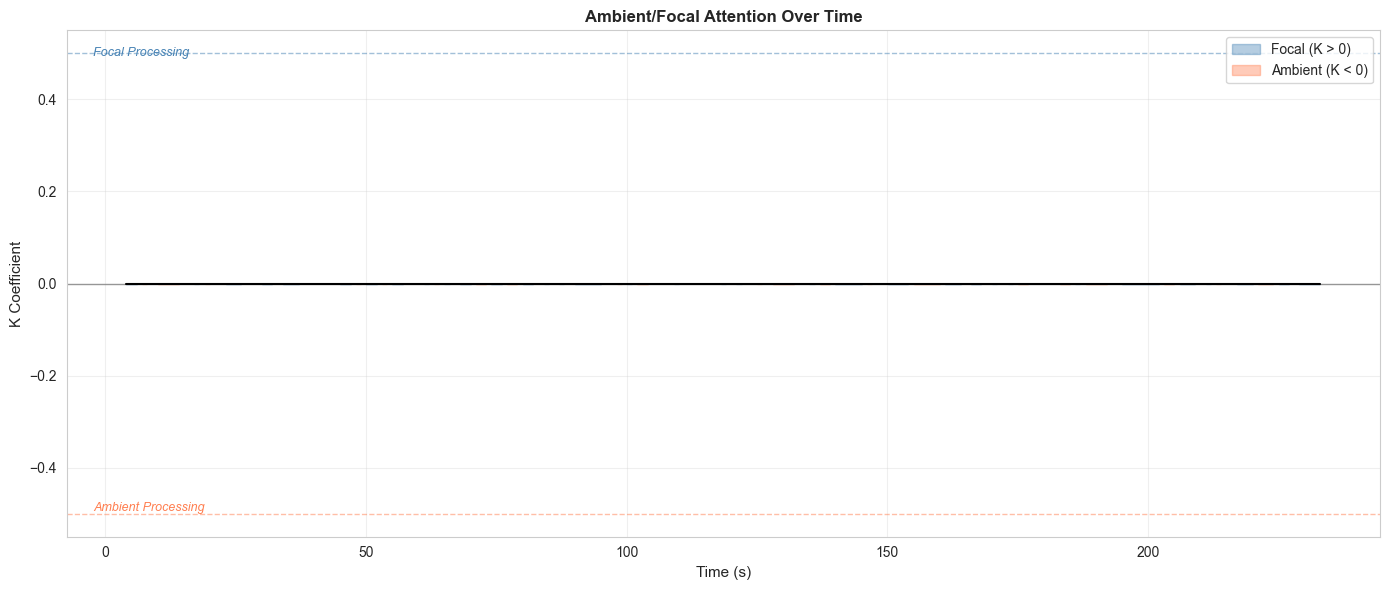


Overall K Coefficient: 0.000
Attention Mode: mixed
Focal Ratio: 53.3%
Ambient Ratio: 46.7%


In [ ]:
# Compute K coefficient over time
k_data = analyzer.compute_k_coefficient_over_time(window_size=5.0, step_size=1.0)

if len(k_data) > 0:
    # Plot K coefficient timeline
    fig = viz.plot_k_coefficient_timeline(
        k_data,
        title="Ambient/Focal Attention Over Time"
    )
    plt.show()
    
    # Summary
    k_result = analyzer.compute_k_coefficient()
    print(f"\nOverall K Coefficient: {k_result['k_coefficient']:.3f}")
    print(f"Attention Mode: {k_result['attention_mode']}")
    print(f"Focal Ratio: {k_result['focal_ratio']:.1%}")
    print(f"Ambient Ratio: {k_result['ambient_ratio']:.1%}")
else:
    print("Insufficient data for K coefficient analysis")

## 32. Reading Behavior Analysis

Analyze reading-specific eye movement patterns including forward saccades, regressions, and line returns.

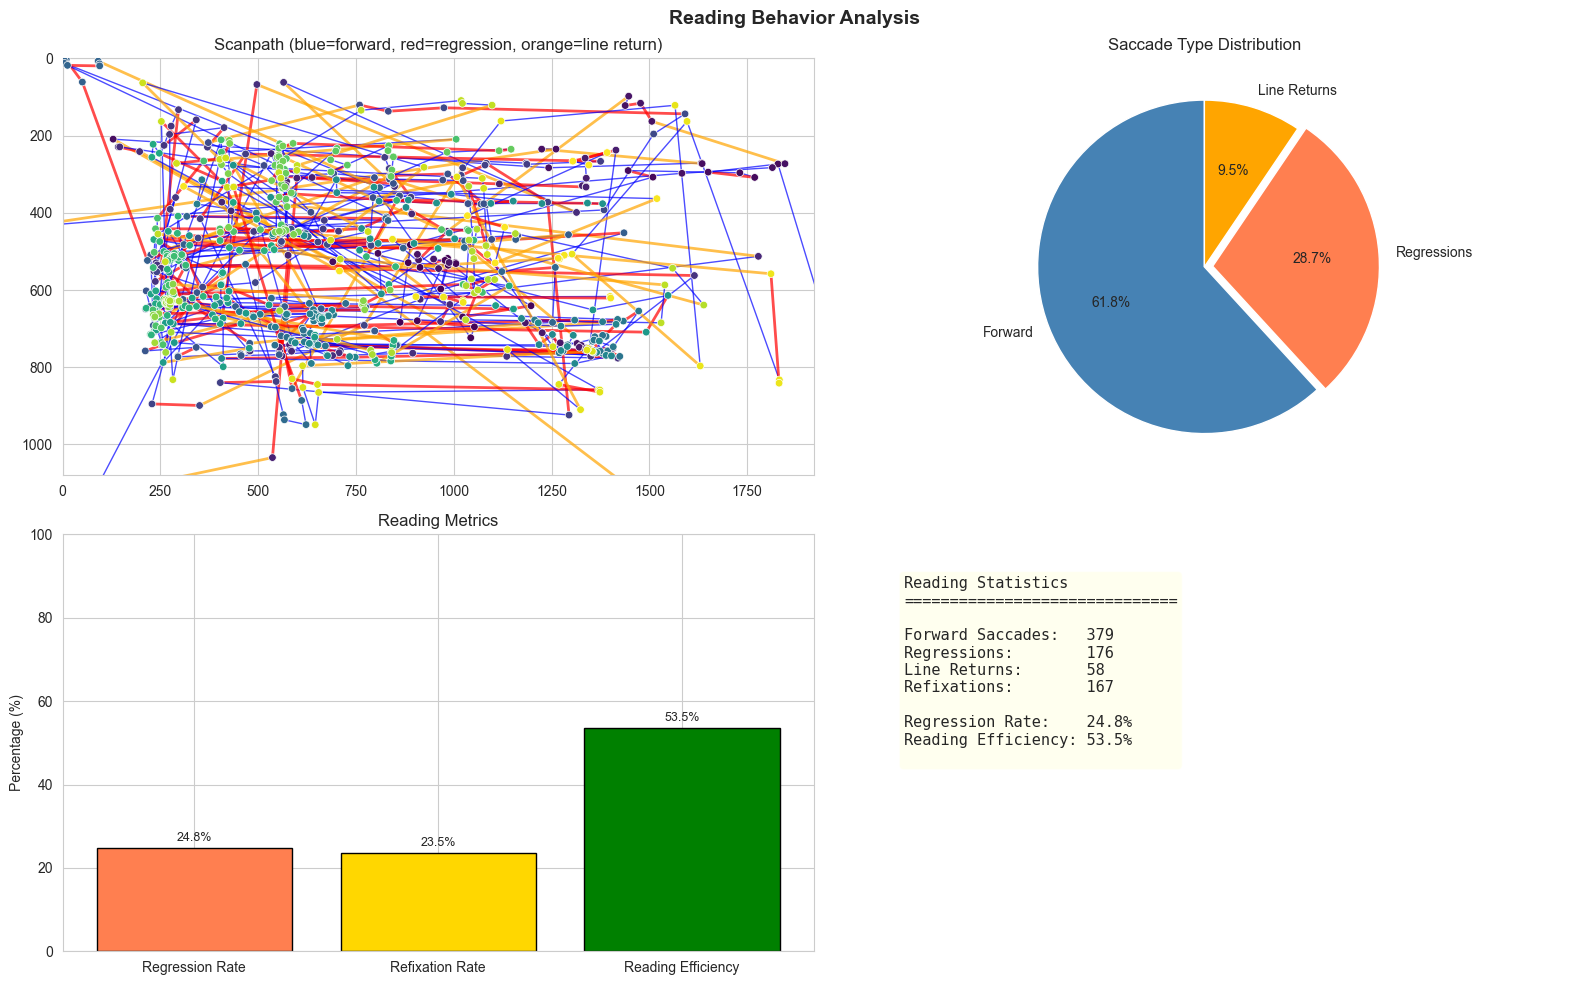


Reading Metrics:
  Forward saccades: 379
  Regressions: 176
  Regression rate: 24.8%
  Reading efficiency: 53.5%


In [ ]:
# Analyze reading behavior
reading_results = analyzer.analyze_reading_behavior(reading_direction="ltr")

# Visualize reading patterns
fig = viz.plot_reading_analysis(
    analyzer.fixations,
    analyzer.saccades,
    reading_results,
    title="Reading Behavior Analysis"
)
plt.show()

print("\nReading Metrics:")
print(f"  Forward saccades: {reading_results['forward_saccade_count']}")
print(f"  Regressions: {reading_results['regression_count']}")
print(f"  Regression rate: {reading_results['regression_rate']:.1%}")
print(f"  Reading efficiency: {reading_results['reading_efficiency']:.1%}")

## 33. Saccade Main Sequence

The main sequence is a fundamental relationship in oculomotor research showing how saccade velocity scales with amplitude.

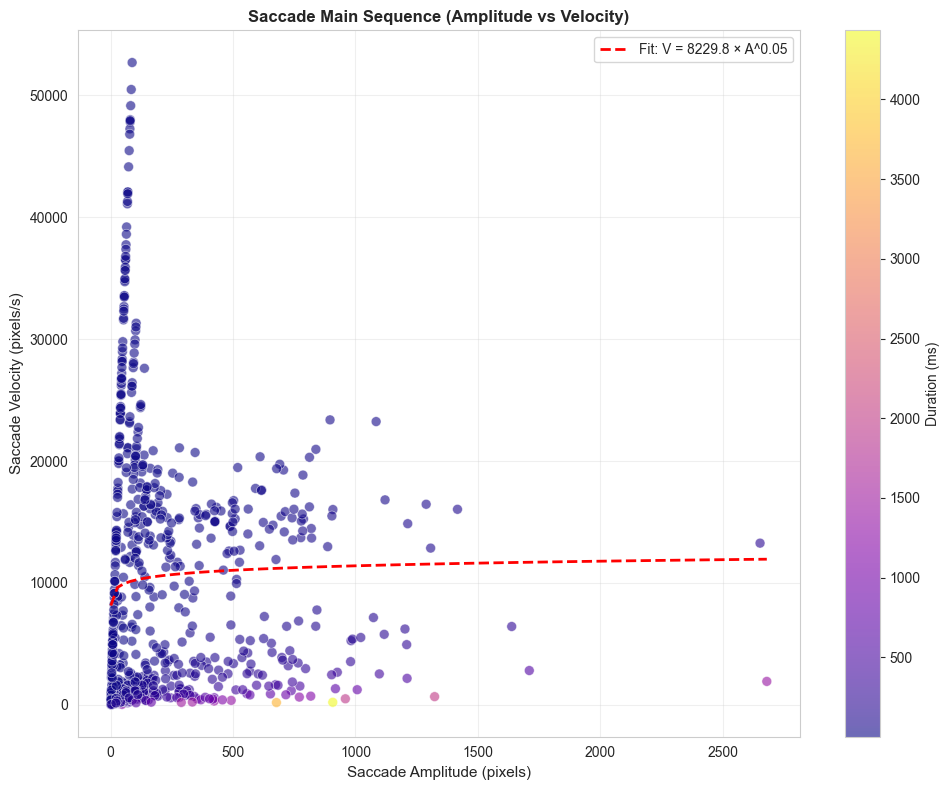


Main Sequence Fit:
  Power law: V = 5.2 × A^0.28
  R² = 0.0701
  Outliers: 9.3%


In [ ]:
# Plot saccade main sequence with power law fit
fig = viz.plot_main_sequence(
    analyzer.saccades,
    title="Saccade Main Sequence (Amplitude vs Velocity)"
)
plt.show()

# Compute main sequence statistics
main_seq = analyzer.compute_main_sequence()
if 'power_law' in main_seq:
    pl = main_seq['power_law']
    print(f"\nMain Sequence Fit:")
    print(f"  Power law: V = {pl['coefficient_A']:.1f} × A^{pl['exponent_B']:.2f}")
    print(f"  R² = {pl['r_squared']:.4f}")
    print(f"  Outliers: {main_seq.get('outlier_percentage', 0):.1f}%")

## 34. Saccade Direction Polar Plot

Visualize the distribution of saccade directions with amplitude encoding.

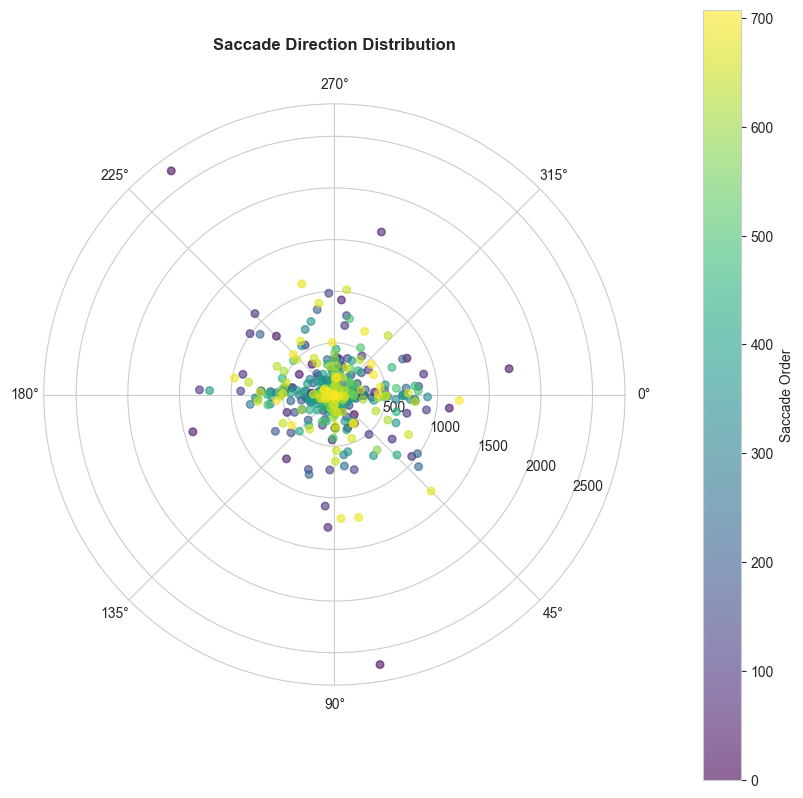

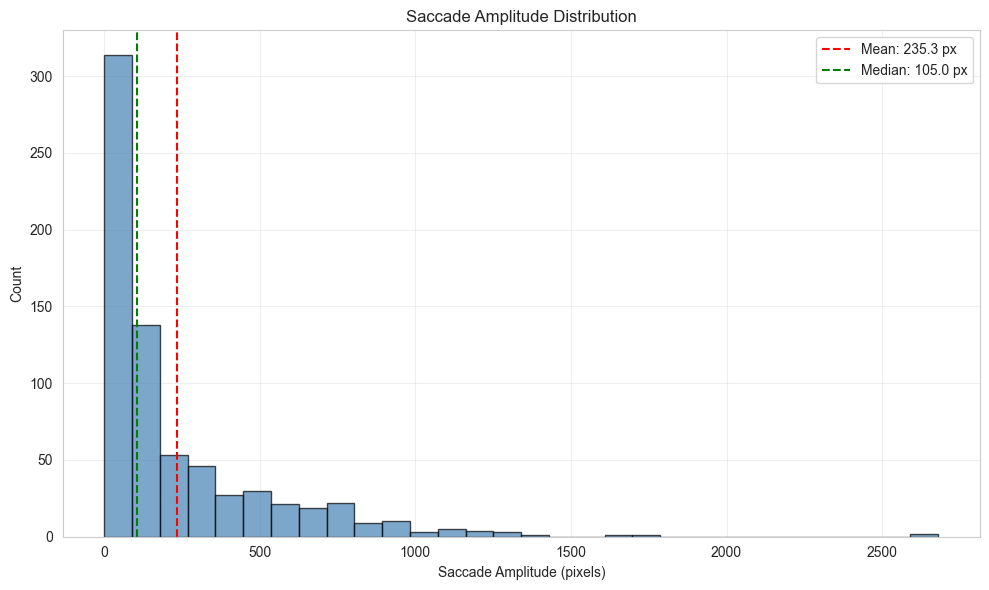

In [ ]:
# Create saccade polar plot
fig = viz.plot_saccade_polar(
    analyzer.saccades,
    title="Saccade Direction Distribution"
)
plt.show()

# Also show amplitude histogram
fig = viz.plot_saccade_amplitude_histogram(
    analyzer.saccades,
    title="Saccade Amplitude Distribution"
)
plt.show()

## 35. AOI Transition Matrix Visualization

Visualize transition probabilities between Areas of Interest as a heatmap.

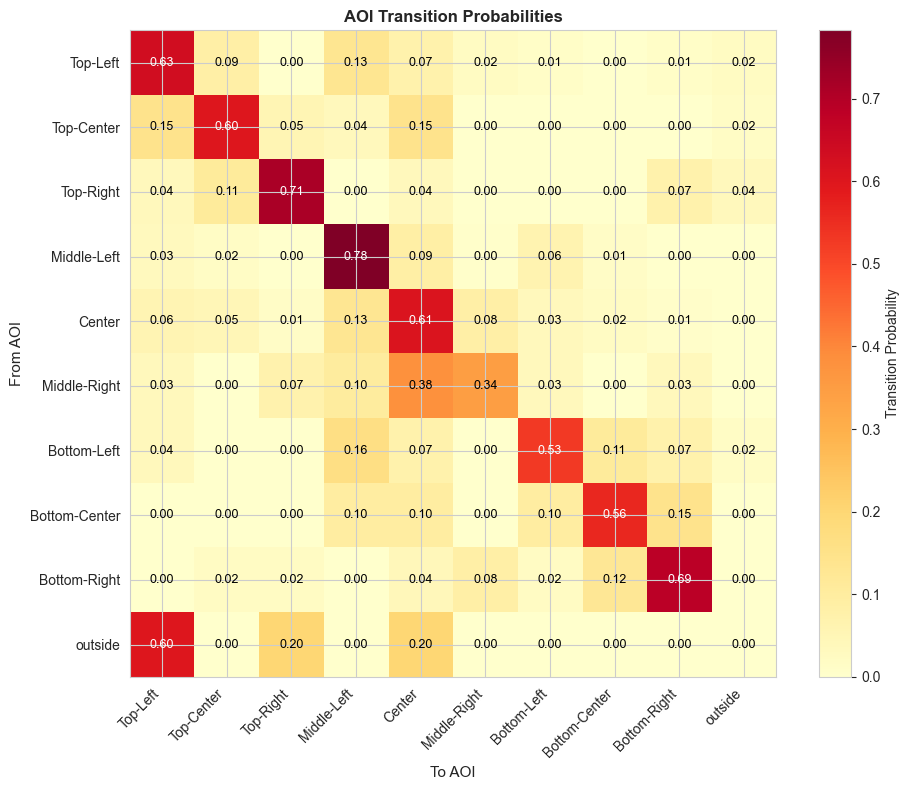


Scanpath Entropy:
  Stationary entropy: 2.851
  Transition entropy: 4.510


In [ ]:
# Define example AOIs (normalized coordinates 0-1)
example_aois = {
    "Top-Left": (0.0, 0.0, 0.33, 0.33),
    "Top-Center": (0.33, 0.0, 0.66, 0.33),
    "Top-Right": (0.66, 0.0, 1.0, 0.33),
    "Middle-Left": (0.0, 0.33, 0.33, 0.66),
    "Center": (0.33, 0.33, 0.66, 0.66),
    "Middle-Right": (0.66, 0.33, 1.0, 0.66),
    "Bottom-Left": (0.0, 0.66, 0.33, 1.0),
    "Bottom-Center": (0.33, 0.66, 0.66, 1.0),
    "Bottom-Right": (0.66, 0.66, 1.0, 1.0),
}

# Compute transition matrix
trans_matrix, aoi_labels = analyzer.compute_aoi_transition_matrix(example_aois, normalize=True)

# Plot transition matrix
fig = viz.plot_aoi_transition_matrix(
    trans_matrix,
    aoi_labels,
    title="AOI Transition Probabilities"
)
plt.show()

# Show entropy analysis
entropy_result = analyzer.compute_scanpath_entropy(example_aois)
print(f"\nScanpath Entropy:")
print(f"  Stationary entropy: {entropy_result.get('stationary_entropy', 0):.3f}")
print(f"  Transition entropy: {entropy_result.get('transition_entropy', 0):.3f}")

## 36. AOI Sequence Diagram

Visualize the temporal sequence of AOI visits.

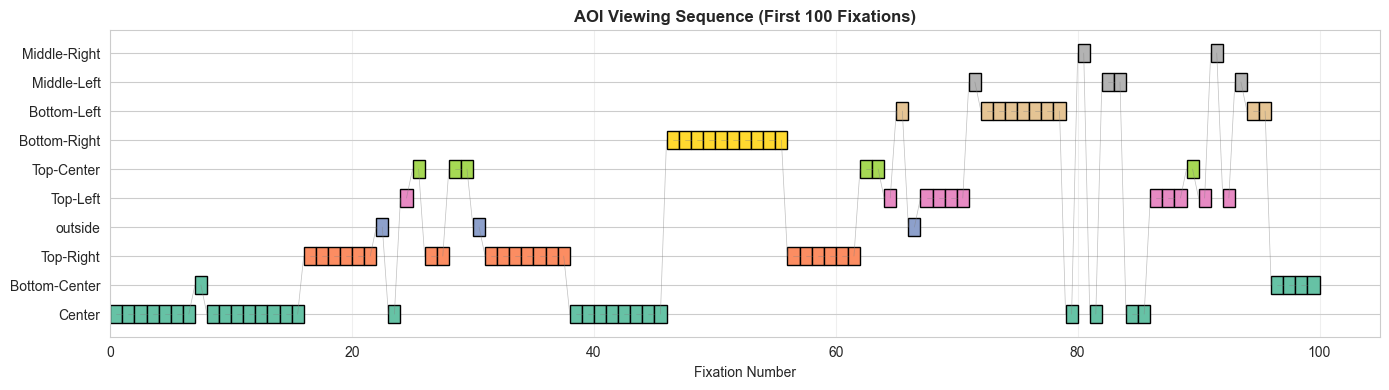

In [ ]:
# Get AOI sequence from entropy results
aoi_sequence = entropy_result.get('aoi_sequence', [])

if aoi_sequence:
    # Plot sequence diagram
    fig = viz.plot_aoi_sequence_diagram(
        aoi_sequence[:100],  # First 100 fixations
        title="AOI Viewing Sequence (First 100 Fixations)"
    )
    plt.show()
else:
    print("No AOI sequence data available")

## 37. Data Quality Dashboard

Comprehensive visualization of eye tracking data quality metrics.

/Users/yenokhakobyan/HCI Lab ToolKit/src/visualization/tobii_viz.py:1448: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.

/Users/yenokhakobyan/HCI Lab ToolKit/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.



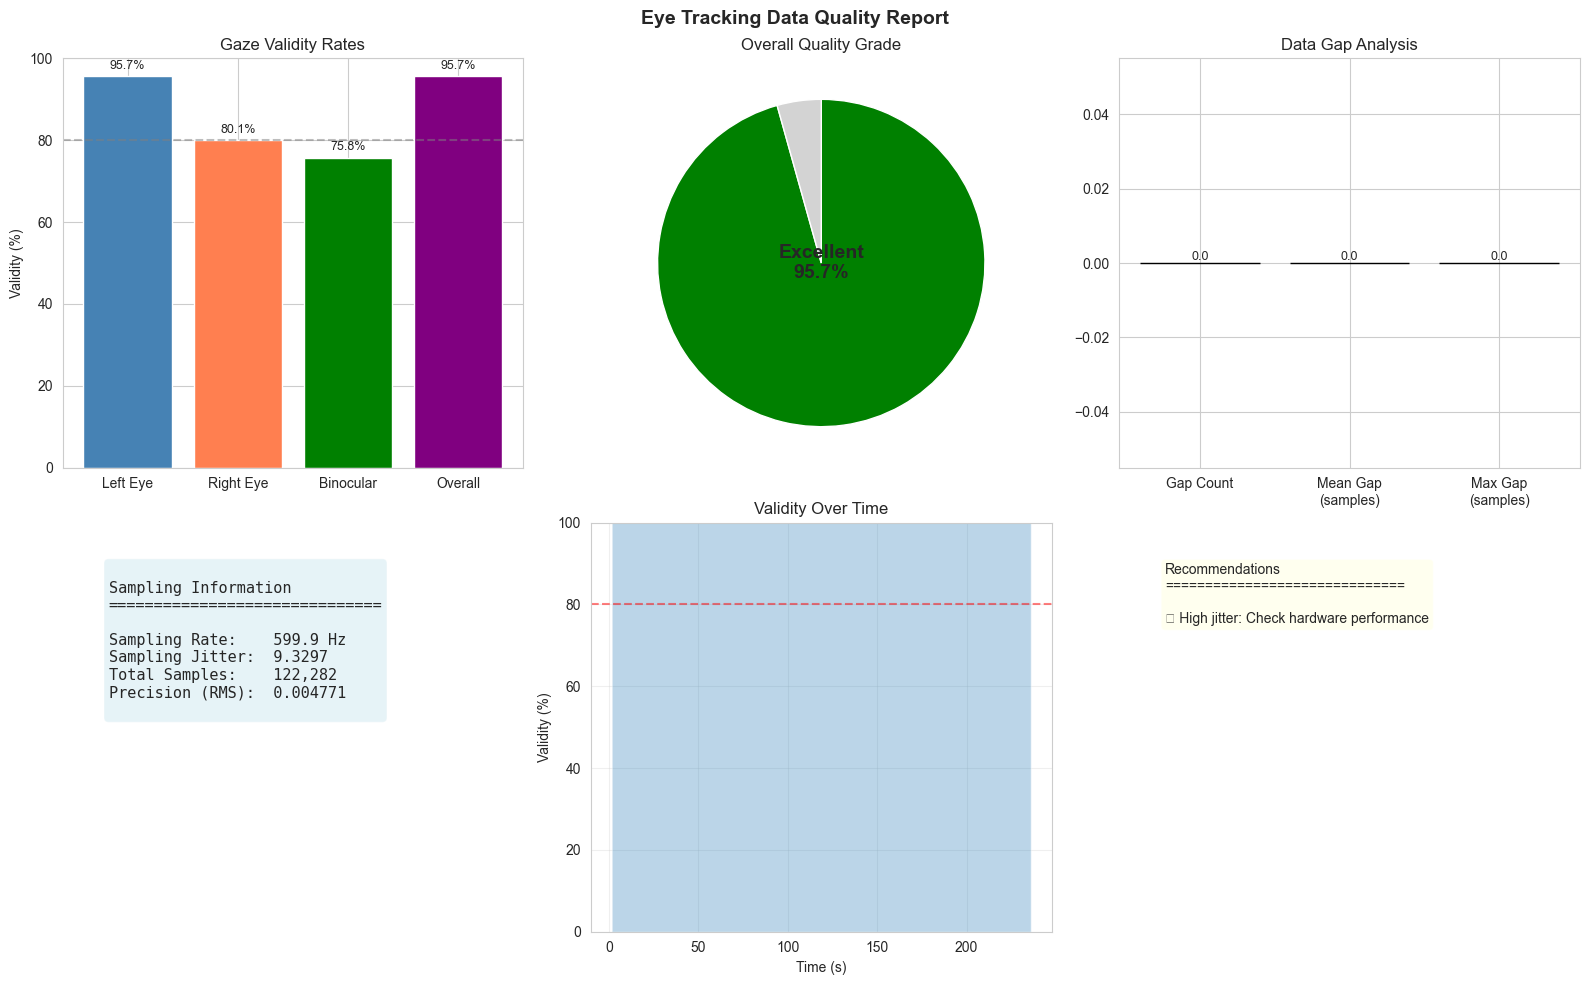


Quality Summary:
  Overall validity: 95.7%
  Sampling rate: 599.9 Hz
  Data gaps: 0


In [ ]:
# Compute data quality metrics
quality_metrics = analyzer.compute_data_quality_metrics()

# Create quality dashboard
fig = viz.plot_data_quality_dashboard(
    quality_metrics,
    analyzer.data,
    title="Eye Tracking Data Quality Report"
)
plt.show()

print("\nQuality Summary:")
print(f"  Overall validity: {quality_metrics.get('overall_validity', 0):.1%}")
print(f"  Sampling rate: {quality_metrics.get('sampling_rate', 0):.1f} Hz")
print(f"  Data gaps: {quality_metrics.get('gap_count', 0)}")

## 38. Scanpath Comparison Visualization

Compare two scanpaths side-by-side with MultiMatch similarity metrics.

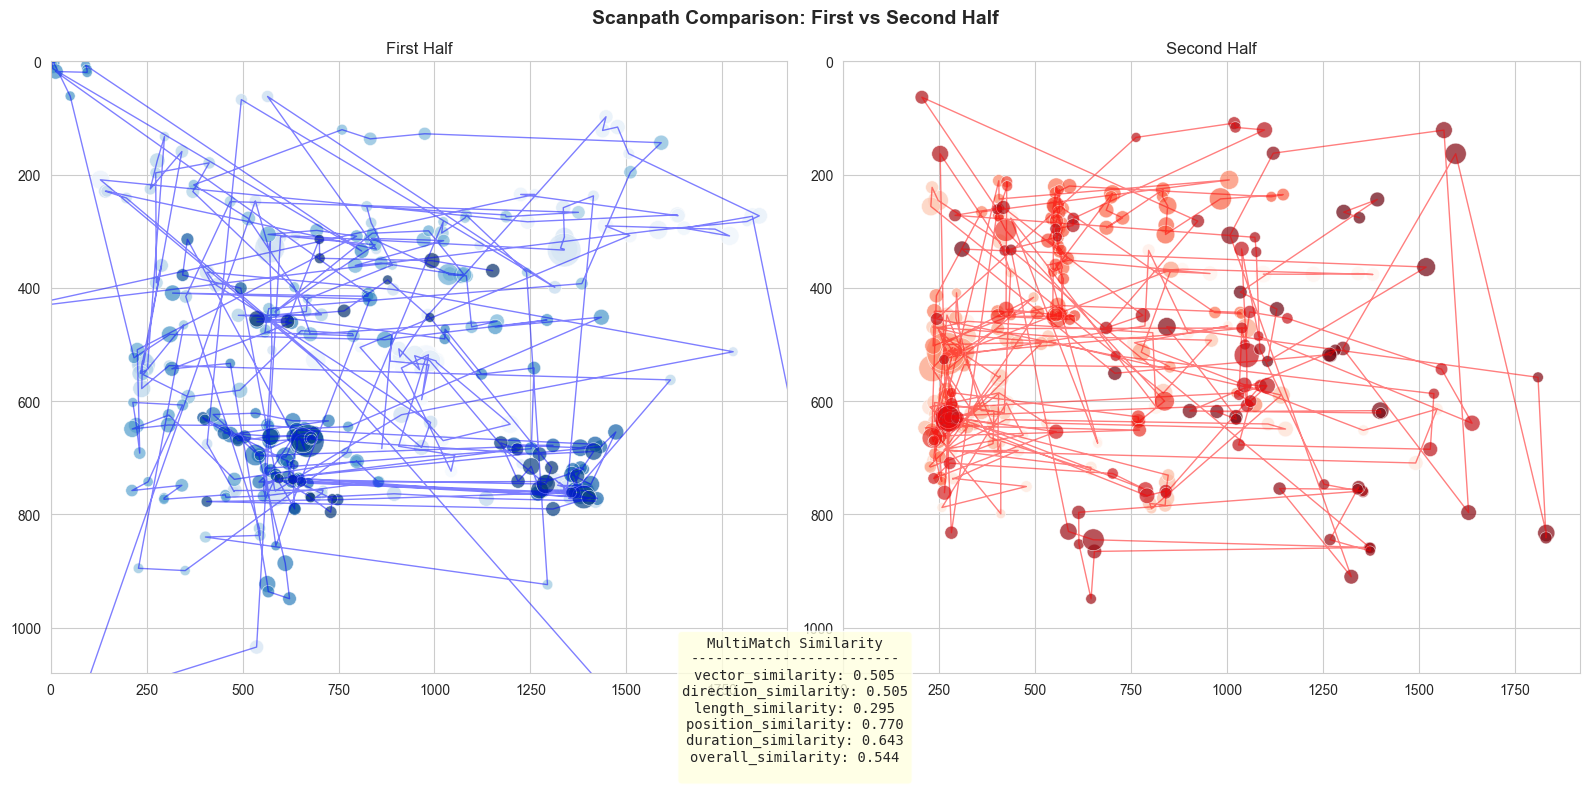


MultiMatch Similarity Scores:
  vector_similarity: 0.505
  direction_similarity: 0.505
  length_similarity: 0.295
  position_similarity: 0.770
  duration_similarity: 0.643
  overall_similarity: 0.544


In [ ]:
# Split fixations into two halves for comparison
mid_point = len(analyzer.fixations) // 2
fixations_1 = analyzer.fixations[:mid_point]
fixations_2 = analyzer.fixations[mid_point:]

# Compute MultiMatch similarity
multimatch_results = analyzer.compute_multimatch(fixations_2)

# Plot comparison
fig = viz.plot_scanpath_comparison(
    fixations_1,
    fixations_2,
    multimatch_results,
    labels=("First Half", "Second Half"),
    title="Scanpath Comparison: First vs Second Half"
)
plt.show()

print("\nMultiMatch Similarity Scores:")
for key, value in multimatch_results.items():
    if isinstance(value, float) and not np.isnan(value):
        print(f"  {key}: {value:.3f}")

## 39. DTW Alignment Visualization

Visualize Dynamic Time Warping alignment between scanpaths.

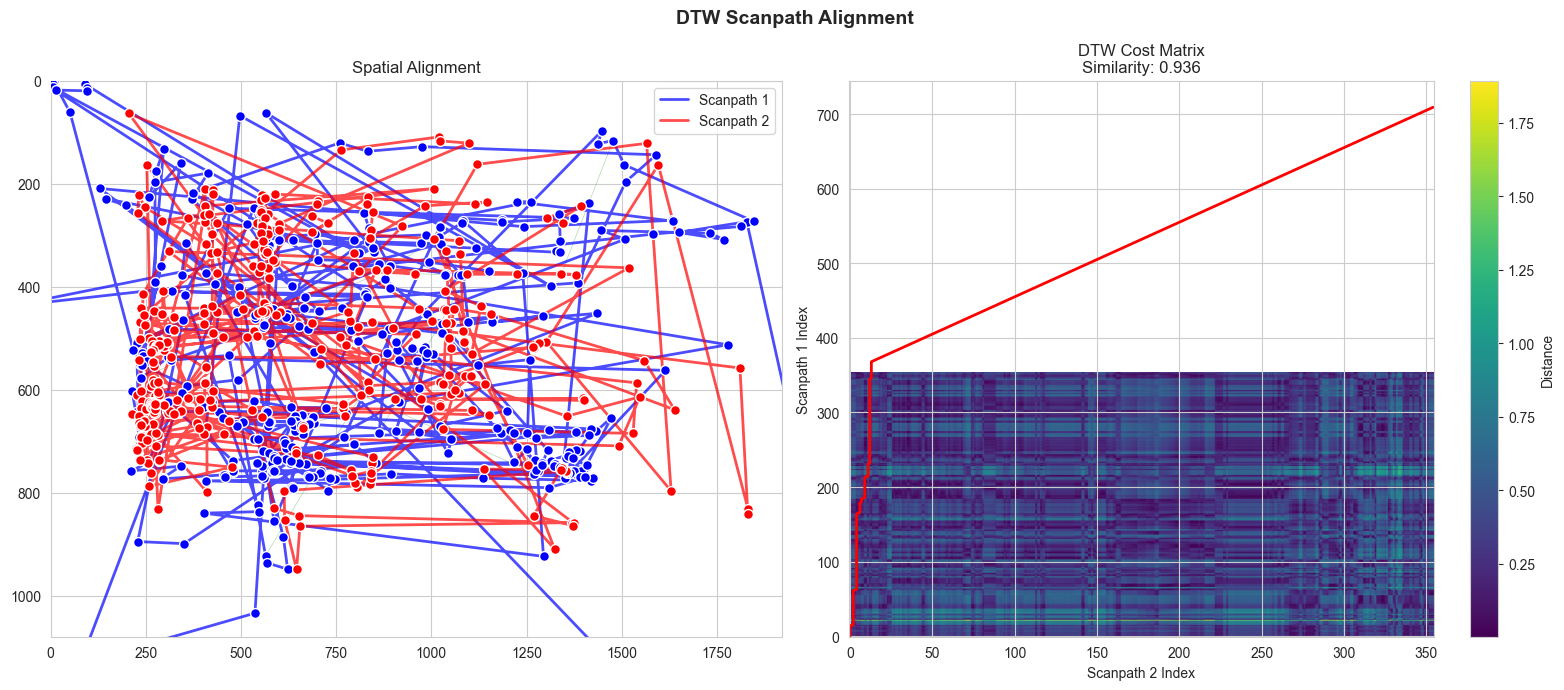


DTW Results:
  DTW Distance: 96.3274
  DTW Similarity: 0.9360
  Warping Ratio: 1.50


In [ ]:
# Compute DTW similarity
dtw_results = analyzer.compute_dtw_similarity(fixations_2, use_duration=True)

# Plot DTW alignment
fig = viz.plot_dtw_alignment(
    fixations_1,
    fixations_2,
    dtw_results,
    title="DTW Scanpath Alignment"
)
plt.show()

print(f"\nDTW Results:")
print(f"  DTW Distance: {dtw_results.get('dtw_distance', 'N/A'):.4f}")
print(f"  DTW Similarity: {dtw_results.get('dtw_similarity', 'N/A'):.4f}")
print(f"  Warping Ratio: {dtw_results.get('warping_ratio', 'N/A'):.2f}")

## 40. Blink Detection and Visualization

Detect and visualize blink events overlaid on pupil data.

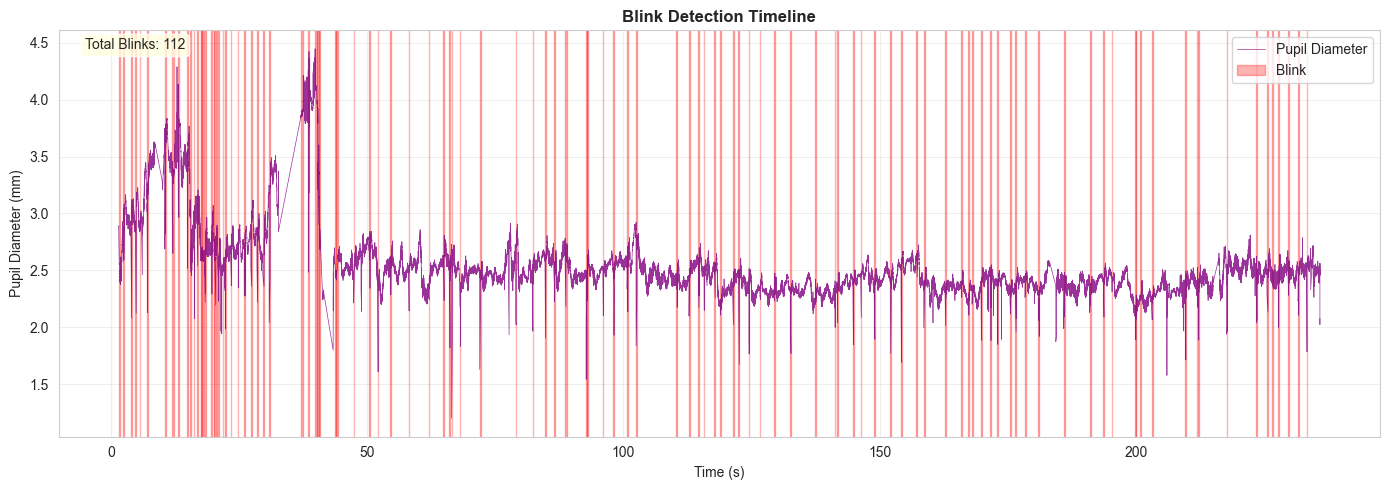


Blink Statistics:
  Total blinks: 112
  Blink rate: 28.7 per minute
  Mean duration: 169.5 ms


In [181]:
# Detect blinks
blinks = analyzer.detect_blinks(min_duration=0.05, max_duration=0.5)
blink_stats = analyzer.get_blink_stats(blinks)

if blinks:
    # Plot blink timeline
    fig = viz.plot_blink_timeline(
        blinks,
        analyzer.data,
        title="Blink Detection Timeline"
    )
    plt.show()
    
    print(f"\nBlink Statistics:")
    print(f"  Total blinks: {blink_stats.get('blink_count', 0)}")
    print(f"  Blink rate: {blink_stats.get('blink_rate_per_minute', 0):.1f} per minute")
    print(f"  Mean duration: {blink_stats.get('mean_duration', 0)*1000:.1f} ms")
else:
    print("No blinks detected in the recording")

## 41. Enhanced Heatmap Visualizations

Alternative heatmap visualizations including contour and 3D surface plots.

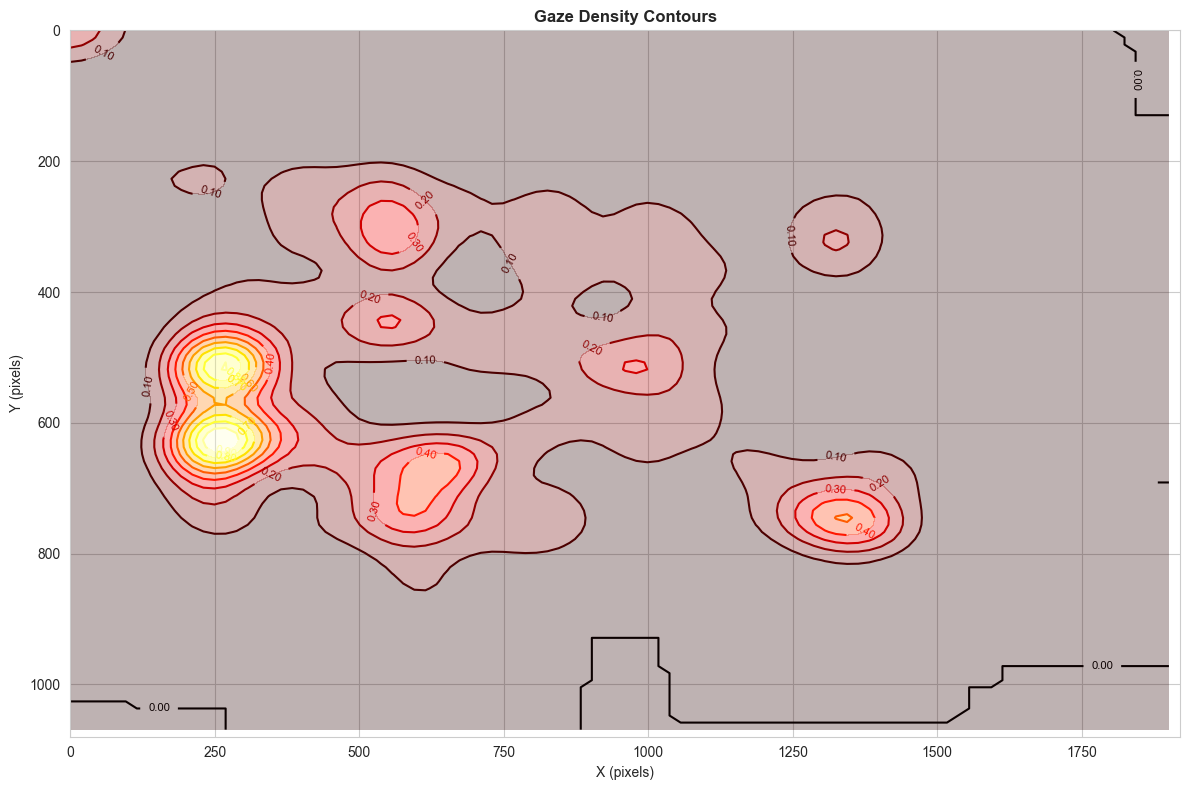

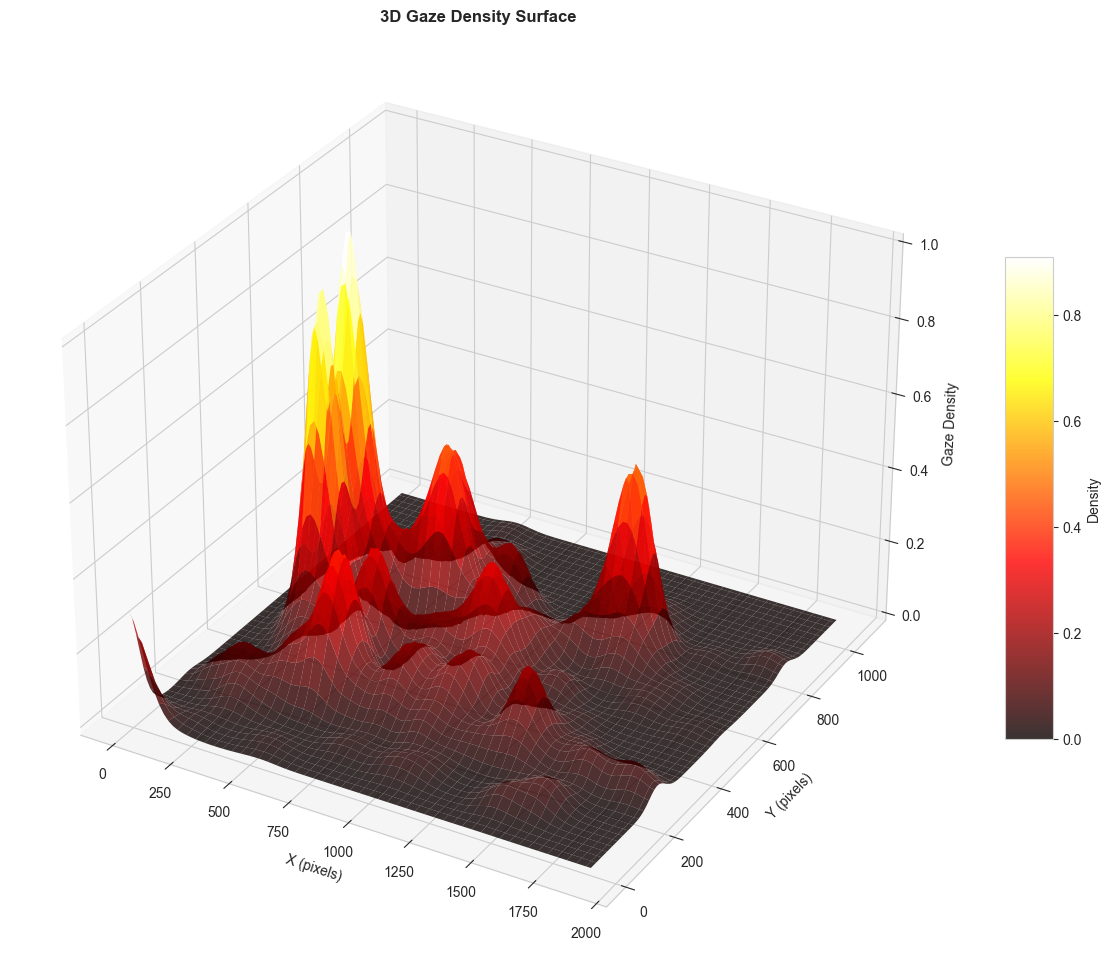

In [182]:
# Generate heatmap
heatmap = analyzer.generate_heatmap(resolution=(100, 100), sigma=3.0)

# Contour heatmap
fig = viz.plot_contour_heatmap(
    heatmap,
    title="Gaze Density Contours",
    levels=10
)
plt.show()

# 3D surface heatmap
fig = viz.plot_3d_heatmap(
    heatmap,
    title="3D Gaze Density Surface"
)
plt.show()

## 42. Microsaccade Analysis

Detect and visualize microsaccade directions during fixations.

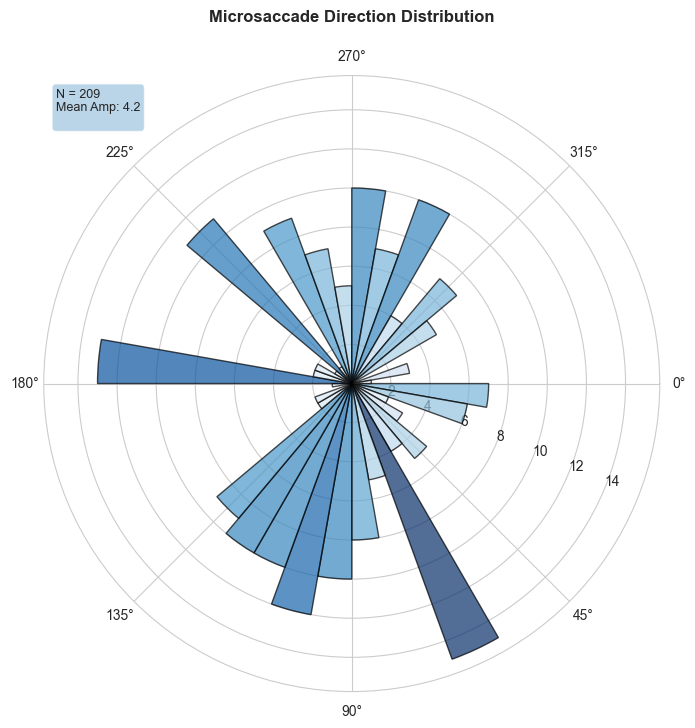


Microsaccade Statistics:
  Count: 209
  Rate: 0.89 per second
  Mean amplitude: 4.19 (×1000)


In [183]:
# Detect microsaccades
microsaccades = analyzer.detect_microsaccades(
    velocity_threshold=6.0,
    min_duration=0.006,
    max_amplitude=0.01
)

if microsaccades:
    # Plot microsaccade polar distribution
    fig = viz.plot_microsaccade_polar(
        microsaccades,
        title="Microsaccade Direction Distribution"
    )
    plt.show()
    
    ms_stats = analyzer.get_microsaccade_stats()
    print(f"\nMicrosaccade Statistics:")
    print(f"  Count: {ms_stats.get('microsaccade_count', 0)}")
    print(f"  Rate: {ms_stats.get('rate_per_second', 0):.2f} per second")
    print(f"  Mean amplitude: {ms_stats.get('mean_amplitude', 0)*1000:.2f} (×1000)")
else:
    print("No microsaccades detected")

## 43. Quick Report & Visualize All

Use the convenience methods to generate a text report and all visualizations at once.

In [184]:
# Generate quick text report
report = analyzer.quick_report()
print(report)

TOBII EYE TRACKING ANALYSIS REPORT

📊 DATA QUALITY
----------------------------------------
  Total samples:     122,282
  Sampling rate:     599.9 Hz
  Overall validity:  95.7%
  Data gaps:         0

👁️ FIXATIONS
----------------------------------------
  Count:             710
  Mean duration:     214.7 ms
  Std duration:      142.5 ms
  Total time:        152.47 s

⚡ SACCADES
----------------------------------------
  Count:             709
  Mean amplitude:    12.26% screen
  Mean velocity:     532.61%/s

👀 PUPIL
----------------------------------------
  Mean diameter:     2.54 mm
  Std diameter:      0.31 mm

🎯 ATTENTION MODE
----------------------------------------
  K coefficient:     0.000
  Attention mode:    mixed



In [185]:
# Optional: Generate all visualizations and save to a directory
# Uncomment the following lines to save all figures:

# output_dir = "../output/tobii_visualizations"
# results = analyzer.visualize_all(
#     output_dir=output_dir,
#     aois=example_aois,
#     show_plots=False  # Set True to display plots
# )
# print(f"\nSaved {len(results['figures'])} figures to {output_dir}")

---

## References

The advanced metrics implemented above are based on established eye tracking research:

1. **K Coefficient (Ambient/Focal Attention)**
   - Krejtz, K., Duchowski, A.T., Niez, A., & Krejtz, I. (2016). Eye tracking cognitive load using pupil diameter and microsaccades with fixed gaze.

2. **Scanpath Entropy**
   - Shiferaw, B., Downey, L., & Crewther, D. (2019). A review of gaze entropy as a measure of visual scanning efficiency.

3. **Index of Cognitive Activity (ICA)**
   - Marshall, S.P. (2002). The Index of Cognitive Activity: Measuring cognitive workload.

4. **LHIPA (Low/High Index of Pupillary Activity)**
   - Duchowski, A.T., et al. (2018). The Low/High Index of Pupillary Activity.

5. **Microsaccade Detection**
   - Engbert, R., & Kliegl, R. (2003). Microsaccades uncover the orientation of covert attention.

6. **Reading Analysis**
   - Rayner, K. (1998). Eye movements in reading and information processing.

7. **Tobii Pro Lab Documentation**
   - https://www.tobii.com/products/software/behavior-research-software/tobii-pro-lab